In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression
from sklearn.metrics import r2_score , mean_squared_error ,confusion_matrix,accuracy_score
import string as st
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',200)
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\GamingStudy_data.csv", encoding = 'ISO-8859-1')

In [3]:
df.GAD2

0        0
1        2
2        2
3        0
4        1
        ..
13459    0
13460    3
13461    0
13462    2
13463    1
Name: GAD2, Length: 13464, dtype: int64

In [4]:
df.drop(['S. No.' , 'Timestamp'] , axis = 1 , inplace = True)

In [5]:
df.describe().T

count       mean        std   min   25%   50%   75%     max
GAD1           13464.0   0.860963   0.926542   0.0   0.0   1.0   1.0     3.0
GAD2           13464.0   0.673351   0.915724   0.0   0.0   0.0   1.0     3.0
GAD3           13464.0   0.965761   0.982776   0.0   0.0   1.0   2.0     3.0
GAD4           13464.0   0.724079   0.921971   0.0   0.0   0.0   1.0     3.0
GAD5           13464.0   0.488042   0.837014   0.0   0.0   0.0   1.0     3.0
GAD6           13464.0   0.911022   0.931168   0.0   0.0   1.0   1.0     3.0
GAD7           13464.0   0.588755   0.894408   0.0   0.0   0.0   1.0     3.0
SWL1           13464.0   3.720440   1.736264   1.0   2.0   4.0   5.0     7.0
SWL2           13464.0   4.602050   1.696276   1.0   3.0   5.0   6.0     7.0
SWL3           13464.0   4.345440   1.809430   1.0   3.0   5.0   6.0     7.0
SWL4           13464.0   3.762032   1.818136   1.0   2.0   4.0   5.0     7.0
SWL5           13464.0   3.358883   1.916319   1.0   2.0   3.0   5.0     7.0
Hours          13434.0  22.247357  70.284502   0.0  12.0  20.0  28.0  8000.0
highestleague      0.0        NaN        NaN   NaN   NaN   NaN   NaN     NaN
streams        13364.0  11.233538  78.549209   0.0   4.0   8.0  15.0  9001.0
SPIN1          13340.0   0.856897   0.907351   0.0   0.0   1.0   1.0     4.0
SPIN2          13310.0   1.210969   1.144054   0.0   0.0   1.0   2.0     4.0
SPIN3          13324.0   1.095392   1.164982   0.0   0.0   1.0   2.0     4.0
SPIN4          13305.0   1.682976   1.229730   0.0   1.0   2.0   3.0     4.0
SPIN5          13298.0   1.248985   1.221828   0.0   0.0   1.0   2.0     4.0
SPIN6          13308.0   1.348287   1.279251   0.0   0.0   1.0   2.0     4.0
SPIN7          13326.0   1.050503   1.221171   0.0   0.0   1.0   2.0     4.0
SPIN8          13320.0   1.405030   1.372777   0.0   0.0   1.0   2.0     4.0
SPIN9          13306.0   1.567338   1.383539   0.0   0.0   1.0   3.0     4.0
SPIN10         13304.0   0.917769   1.125849   0.0   0.0   1.0   1.0     4.0
SPIN11         13277.0   1.827446   1.488372   0.0   0.0   2.0   3.0     4.0
SPIN12         13296.0   0.892148   1.158235   0.0   0.0   0.0   1.0     4.0
SPIN13         13277.0   0.538827   0.944180   0.0   0.0   0.0   1.0     4.0
SPIN14         13308.0   1.252405   1.207463   0.0   0.0   1.0   2.0     4.0
SPIN15         13317.0   1.411054   1.349874   0.0   0.0   1.0   2.0     4.0
SPIN16         13317.0   0.620635   0.961853   0.0   0.0   0.0   1.0     4.0
SPIN17         13289.0   0.935962   1.180456   0.0   0.0   0.0   2.0     4.0
Narcissism     13441.0   2.027677   1.061842   1.0   1.0   2.0   3.0     5.0
Age            13464.0  20.930407   3.300897  18.0  18.0  20.0  22.0    63.0
GAD_T          13464.0   5.211973   4.713267   0.0   2.0   4.0   8.0    21.0
SWL_T          13464.0  19.788844   7.229243   5.0  14.0  20.0  26.0    35.0
SPIN_T         12814.0  19.848525  13.467493   0.0   9.0  17.0  28.0    68.0

In [6]:
df.dtypes

GAD1                 int64
GAD2                 int64
GAD3                 int64
GAD4                 int64
GAD5                 int64
GAD6                 int64
GAD7                 int64
GADE                object
SWL1                 int64
SWL2                 int64
SWL3                 int64
SWL4                 int64
SWL5                 int64
Game                object
Platform            object
Hours              float64
earnings            object
whyplay             object
League              object
highestleague      float64
streams            float64
SPIN1              float64
SPIN2              float64
SPIN3              float64
SPIN4              float64
SPIN5              float64
SPIN6              float64
SPIN7              float64
SPIN8              float64
SPIN9              float64
SPIN10             float64
SPIN11             float64
SPIN12             float64
SPIN13             float64
SPIN14             float64
SPIN15             float64
SPIN16             float64
S

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GAD1             13464 non-null  int64  
 1   GAD2             13464 non-null  int64  
 2   GAD3             13464 non-null  int64  
 3   GAD4             13464 non-null  int64  
 4   GAD5             13464 non-null  int64  
 5   GAD6             13464 non-null  int64  
 6   GAD7             13464 non-null  int64  
 7   GADE             12815 non-null  object 
 8   SWL1             13464 non-null  int64  
 9   SWL2             13464 non-null  int64  
 10  SWL3             13464 non-null  int64  
 11  SWL4             13464 non-null  int64  
 12  SWL5             13464 non-null  int64  
 13  Game             13464 non-null  object 
 14  Platform         13464 non-null  object 
 15  Hours            13434 non-null  float64
 16  earnings         13464 non-null  object 
 17  whyplay     

In [8]:
df.isnull().sum()

GAD1                   0
GAD2                   0
GAD3                   0
GAD4                   0
GAD5                   0
GAD6                   0
GAD7                   0
GADE                 649
SWL1                   0
SWL2                   0
SWL3                   0
SWL4                   0
SWL5                   0
Game                   0
Platform               0
Hours                 30
earnings               0
whyplay                0
League              1838
highestleague      13464
streams              100
SPIN1                124
SPIN2                154
SPIN3                140
SPIN4                159
SPIN5                166
SPIN6                156
SPIN7                138
SPIN8                144
SPIN9                158
SPIN10               160
SPIN11               187
SPIN12               168
SPIN13               187
SPIN14               156
SPIN15               147
SPIN16               147
SPIN17               175
Narcissism            23
Gender                 0


In [9]:
for i in df:
    print('-------------')
    print(df[i].value_counts().head(15))
    print('-------------')

-------------
0    5694
1    5099
2    1520
3    1151
Name: GAD1, dtype: int64
-------------
-------------
0    7616
1    3576
2    1326
3     946
Name: GAD2, dtype: int64
-------------
-------------
0    5319
1    4708
2    2016
3    1421
Name: GAD3, dtype: int64
-------------
-------------
0    7129
1    3884
2    1488
3     963
Name: GAD4, dtype: int64
-------------
-------------
0    9236
1    2576
2     961
3     691
Name: GAD5, dtype: int64
-------------
-------------
0    5386
1    4993
2    1982
3    1103
Name: GAD6, dtype: int64
-------------
-------------
0    8444
1    2961
2    1211
3     848
Name: GAD7, dtype: int64
-------------
-------------
Not difficult at all    6236
Somewhat difficult      5148
Very difficult          1012
Extremely difficult      419
Name: GADE, dtype: int64
-------------
-------------
2    3043
5    2727
6    2218
3    2099
4    1625
1    1333
7     419
Name: SWL1, dtype: int64
-------------
-------------
6    3715
5    2869
4    1724
3    1660
2  

In [10]:
for i in df:
    print('------',i,'------')
    print(df[i].unique()[:30])
    print('-------------')

------ GAD1 ------
[0 1 2 3]
-------------
------ GAD2 ------
[0 2 1 3]
-------------
------ GAD3 ------
[0 2 3 1]
-------------
------ GAD4 ------
[0 2 3 1]
-------------
------ GAD5 ------
[1 0 2 3]
-------------
------ GAD6 ------
[0 1 3 2]
-------------
------ GAD7 ------
[0 1 2 3]
-------------
------ GADE ------
['Not difficult at all' 'Somewhat difficult' 'Very difficult' nan
 'Extremely difficult']
-------------
------ SWL1 ------
[3 2 5 7 6 1 4]
-------------
------ SWL2 ------
[5 6 2 4 3 7 1]
-------------
------ SWL3 ------
[5 2 4 3 6 7 1]
-------------
------ SWL4 ------
[5 2 3 6 1 7 4]
-------------
------ SWL5 ------
[5 1 2 3 7 6 4]
-------------
------ Game ------
['Skyrim' 'Other' 'World of Warcraft' 'League of Legends' 'Starcraft 2'
 'Counter Strike' 'Destiny' 'Diablo 3' 'Heroes of the Storm' 'Hearthstone'
 'Guild Wars 2']
-------------
------ Platform ------
['Console (PS, Xbox, ...)' 'PC' 'Smartphone / Tablet']
-------------
------ Hours ------
[15.  8.  0. 20.  4. 3

In [11]:
for i in df:
    print('------',i,'------')
    print(df[i].nunique())
    print('-------------')

------ GAD1 ------
4
-------------
------ GAD2 ------
4
-------------
------ GAD3 ------
4
-------------
------ GAD4 ------
4
-------------
------ GAD5 ------
4
-------------
------ GAD6 ------
4
-------------
------ GAD7 ------
4
-------------
------ GADE ------
4
-------------
------ SWL1 ------
7
-------------
------ SWL2 ------
7
-------------
------ SWL3 ------
7
-------------
------ SWL4 ------
7
-------------
------ SWL5 ------
7
-------------
------ Game ------
11
-------------
------ Platform ------
3
-------------
------ Hours ------
84
-------------
------ earnings ------
314
-------------
------ whyplay ------
407
-------------
------ League ------
1455
-------------
------ highestleague ------
0
-------------
------ streams ------
65
-------------
------ SPIN1 ------
5
-------------
------ SPIN2 ------
5
-------------
------ SPIN3 ------
5
-------------
------ SPIN4 ------
5
-------------
------ SPIN5 ------
5
-------------
------ SPIN6 ------
5
-------------
------ SPIN7 

In [12]:
df.shape

(13464, 53)

In [13]:
df['Hours_streams'] = df['Hours'] + df['streams']
df.drop(  ((df[df['Hours_streams'] > 115].index) | (df[df['Hours_streams']==0].index)),
                                             axis=0,inplace=True)

In [14]:
df['Hours_streams'].value_counts()

30.0     961
25.0     763
40.0     732
35.0     689
20.0     662
22.0     443
15.0     427
50.0     415
45.0     397
28.0     358
18.0     328
60.0     306
24.0     298
23.0     280
17.0     278
26.0     272
32.0     251
16.0     250
12.0     246
21.0     246
10.0     245
55.0     225
13.0     218
14.0     212
27.0     207
19.0     184
38.0     182
33.0     166
34.0     166
70.0     163
36.0     156
11.0     155
31.0     153
42.0     143
8.0      121
37.0     111
29.0     109
80.0     107
65.0     101
7.0       98
9.0       94
43.0      90
41.0      84
44.0      78
6.0       73
47.0      61
5.0       59
48.0      59
39.0      56
46.0      53
52.0      52
75.0      46
90.0      42
56.0      39
49.0      36
53.0      36
4.0       35
51.0      34
54.0      31
58.0      28
100.0     24
57.0      22
63.0      21
62.0      20
85.0      19
3.0       18
64.0      17
110.0     17
68.0      14
76.0      13
59.0      12
66.0      11
72.0      10
105.0     10
61.0      10
74.0      10
84.0      10

In [15]:
df.GADE.value_counts()

Not difficult at all    6218
Somewhat difficult      5132
Very difficult          1004
Extremely difficult      409
Name: GADE, dtype: int64

In [16]:
df.GADE.fillna(df.GADE.value_counts().index[1] , inplace=True) #1
df.GADE.value_counts()

Not difficult at all    6218
Somewhat difficult      5780
Very difficult          1004
Extremely difficult      409
Name: GADE, dtype: int64

In [17]:
df.shape

(13411, 54)

In [18]:
df.streams.fillna(int(df.streams.mean()) , inplace = True)
df.Hours.fillna(int(df.Hours.mean()) , inplace = True)
df.drop('Hours_streams' , axis = 1 , inplace = True)
print(df.League.nunique())
df.League = df.League.str.lower().str.strip()
print(df.League.nunique())

1444
1199


In [19]:
df["League"].value_counts().head(50)

gold            1347
silver           899
platinum         838
diamond          728
unranked         393
gold 3           265
gold 1           264
diamond 5        264
gold 5           263
silver 1         250
gold v           227
silver 2         219
gold 2           218
silver 3         199
bronze           191
platinum 3       159
gold 4           156
platinum 1       143
silver 4         138
platinum 2       138
platinum 5       128
silver 5         121
diamond v        110
platinum 4       102
plat             100
diamond 3         96
diamond 4         96
platinum v        89
plat 5            87
plat 3            84
gold iv           82
diamond 1         75
master            74
plat 2            72
gold iii          69
bronze 1          69
silver iii        68
plat 1            67
plat 4            62
diamond 2         61
silver v          59
silver iv         59
bronze 2          58
bronze 3          55
challenger        53
silver i          52
silver ii         50
platinum iii 

In [20]:
df["League"] =df["League"].str.extract(r'^([a-z]+)')
df.League.nunique()

207

In [21]:
df.League.unique()

array([nan, 'gold', 'none', 'na', 'diamond', 'not', 'bronze', 'silver',
       'n', 'unranked', 'bad', 'legendary', 'global', 'potato', 'master',
       'silverii', 'platinum', 'masters', 'challenger', 'lvl', 'platin',
       'promos', 'top', 'd', 'plat', 'i', 'rank', 'grandmaster',
       'platnium', 's', 'haven', 'platinium', 'in', 'gv', 'provisional',
       'placements', 'g', 'was', 'the', 'division', 'pplatinum', 'hr',
       'only', 'platium', 'legend', 'platine', 'plarinum', 'dmg',
       'sliver', 'dont', 'high', 'very', 'starcraft', 'challenjour',
       'fusion', 'low', 'unraked', 'havent', 'got', 'golden', 'cs', 'p',
       'standard', 'still', 'highest', 'nope', 'dia', 'league', 'nova',
       'mge', 'silber', 'siver', 'never', 'b', 'platinun', 'mg',
       'supreme', 'for', 'greater', 'wood', 'le', 'no', 'natural', 'aram',
       'don', 'currently', 'noone', 'grand', 'hs', 'current', 'last',
       'first', 'recently', 'fucking', 'grandmasters', 'golf', 'of',
       'glod'

In [22]:
df.loc[(df['whyplay']== 'having fun') ,'League'] =df.loc[(df['whyplay']== 'having fun') ,'League'].fillna('unranked')
df.League.fillna('gold' , inplace = True)
golds = ['g', 'gv', 'golden' ,'glod' ,'golld' ,'golf', 'goled', 'golderino' ,'giii']
df['League'] = df.League.replace(golds , 'gold')
silvers = [ 'silverii' , 's' , 'sliver' , 'siver' , 'silber' , 'sil' , 'silveriv']
df['League'] = df.League.replace(silvers , 'silver')
plats = [
    'platinium' , 'platnium' , 'platin' ,'pplatinum' ,'plarinum' ,'platium', 'p' ,'platine' ,
    'platinun' ,'platonum' ,'platnum', 'plata' ,'plantinum',
    'platinuim' ,'platunum', 'plantinum' ,'platunum' ,'platinumm' ,'platv' ,'platina' , 'plat' 
]
df['League'] = df.League.replace(plats , 'platinum')
bronzers = ['bronce' , 'b' , 'broze' ,'lowest' , 'wood', 'elohell'] 
df['League'] = df.League.replace(bronzers , 'bronze')

In [23]:
unranked = ['none' ,'na', 'not' ,'n' ,'promos' ,'provisional' ,'placements' , 'dont' , 'was', 'unraked',
            'havent', 'never', 'nope', 'no', 'noone', 'don', 'of', 'unrranked', 'new', 'what', 'unrank' ,
            'ranked', 'placement', 'unrankt' , 'non', 'unfranked' , 'promotion', 'idk',
            'unplaced', 'probably', 'provisionals', 'didnt' ,'unrakned' , 'unfinished' , 'just' , 'x' ,
            'promotions' , 'unseeded' , 'haven']
df['League'] = df.League.replace(unranked , 'unranked')

In [24]:
diamonds =  ['d', 'dia', 'diaomnd', 'diamont','diamomd']
df['League'] = df.League.replace(diamonds , 'diamond')

In [25]:
gm =  ['grand', 'gm', 'grandmasters']
df['League'] = df.League.replace(gm , 'grandmaster')
chall =  ['challenjour', 'c', 'charrenjour', 'challeneger']
df['League'] = df.League.replace(chall , 'challenger')
df['League'] = df.League.replace('mg' , 'mge')
df['League'] = df.League.replace('masters' , 'master')
df['League'] = df.League.replace( ['le', 'legdendary'] , 'legendary')

In [26]:
df.League.value_counts()

gold             4074
platinum         2640
silver           2278
unranked         1714
diamond          1628
bronze            552
master            163
challenger         76
rank               28
i                  20
grandmaster        17
currently          11
dmg                11
mge                 8
high                8
season              8
legendary           8
lol                 7
league              7
still               7
in                  7
top                 6
cs                  6
legend              6
nova                5
supreme             4
greater             4
last                3
csgo                3
lem                 3
starcraft           3
used                2
ugc                 2
peaked              2
sc                  2
finished            2
level               2
mid                 2
aram                2
eu                  2
the                 2
for                 2
division            2
low                 2
global              2
got       

In [27]:
counts = df['League'].value_counts()
df['League'] = df['League'][~df['League'].isin(counts[counts < 3].index)]

In [28]:
df['League'] = df.League.replace(['i' , 'currently' , 'high' , 'season' , 'lol','cs' ,
                                  'last' ,'csgo','starcraft' ,'geater' , 'in', 'rank' , 'still'] , np.nan)
df.League.fillna('unspecified' , inplace=True)

In [29]:
df.League.unique()

array(['unranked', 'gold', 'diamond', 'bronze', 'silver', 'unspecified',
       'legendary', 'master', 'platinum', 'challenger', 'top',
       'grandmaster', 'legend', 'dmg', 'league', 'nova', 'mge', 'supreme',
       'greater', 'lem'], dtype=object)

In [30]:
df.League.value_counts()

gold           4074
platinum       2640
silver         2278
unranked       1714
diamond        1628
bronze          552
unspecified     207
master          163
challenger       76
grandmaster      17
dmg              11
legendary         8
mge               8
league            7
top               6
legend            6
nova              5
supreme           4
greater           4
lem               3
Name: League, dtype: int64

In [31]:
df['Narcissism'].value_counts()

1.0    5240
2.0    4344
3.0    2335
4.0    1147
5.0     322
Name: Narcissism, dtype: int64

In [32]:
df.drop(["Birthplace","Birthplace_ISO3"],axis=1,inplace=True)
df['Residence'] = df['Residence'].replace('Unknown',df['Residence'].mode()[0])
df['Reference'].fillna('Other',inplace=True)
df.drop(df[df['accept'].isnull()].index , axis=0 , inplace=True)
df['Residence_ISO3'].fillna('USA',inplace=True) #11063
df.loc[11063,'Residence_ISO3'] = 'XXK'

In [33]:
col = ['SPIN1','SPIN2','SPIN3','SPIN4','SPIN5','SPIN6','SPIN7','SPIN8','SPIN9',
     'SPIN10','SPIN11','SPIN12','SPIN13','SPIN14','SPIN15','SPIN16','SPIN17' ,'SPIN_T']
for i in col :
    df[i].fillna(df[i].mode()[0], inplace = True)

In [34]:
df['Playstyle'] = df['Playstyle'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
df['earnings'] = df['earnings'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
df['whyplay'] = df['whyplay'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))

In [35]:
df['Playstyle'] = df['Playstyle'].str.lower().str.strip()
df['whyplay'] = df['whyplay'].str.lower().str.strip()
df['earnings'] = df['earnings'].str.lower().str.strip()

In [36]:
df['Playstyle'].nunique()

278

In [37]:
df.drop('highestleague' , axis = 1 , inplace = True)

In [38]:
df.head(7)

GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7                  GADE  SWL1  SWL2  \
0     0     0     0     0     1     0     0  Not difficult at all     3     5   
1     1     2     2     2     0     1     0    Somewhat difficult     3     5   
3     0     0     0     0     0     0     0  Not difficult at all     2     5   
4     2     1     2     2     2     3     2        Very difficult     2     2   
5     0     0     0     0     0     1     0  Not difficult at all     3     5   
6     0     0     0     0     0     0     0  Not difficult at all     3     4   
7     0     0     0     0     0     0     0    Somewhat difficult     3     6   

   SWL3  SWL4  SWL5    Game                 Platform  Hours        earnings  \
0     5     5     5  Skyrim  Console (PS, Xbox, ...)   15.0  i play for fun   
1     2     5     1   Other                       PC    8.0  i play for fun   
3     5     3     2   Other                       PC   20.0  i play for fun   
4     4     5     1   Other  Console (PS, Xbox, ...)   20.0  i play for fun   
5     3     3     3   Other  Console (PS, Xbox, ...)    4.0  i play for fun   
6     4     3     2   Other                       PC   30.0  i play for fun   
7     4     3     7   Other  Console (PS, Xbox, ...)   25.0  i play for fun   

      whyplay    League  streams  SPIN1  SPIN2  SPIN3  SPIN4  SPIN5  SPIN6  \
0  having fun  unranked      0.0    1.0    0.0    0.0    1.0    0.0    0.0   
1  having fun  unranked      2.0    2.0    1.0    1.0    3.0    2.0    3.0   
3   improving      gold      5.0    2.0    0.0    0.0    1.0    3.0    0.0   
4  having fun  unranked      1.0    2.0    0.0    0.0    0.0    1.0    0.0   
5    relaxing      gold      0.0    1.0    1.0    2.0    3.0    2.0    1.0   
6    relaxing      gold      8.0    1.0    2.0    2.0    3.0    1.0    1.0   
7  having fun  unranked      0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   SPIN7  SPIN8  SPIN9  SPIN10  SPIN11  SPIN12  SPIN13  SPIN14  SPIN15  \
0    1.0    0.0    0.0     0.0     0.0     0.0     0.0     1.0     0.0   
1    1.0    3.0    4.0     0.0     3.0     0.0     1.0     3.0     3.0   
3    0.0    0.0    0.0     0.0     1.0     3.0     0.0     0.0     1.0   
4    0.0    4.0    2.0     0.0     1.0     0.0     0.0     0.0     0.0   
5    0.0    0.0    0.0     1.0     0.0     0.0     0.0     1.0     1.0   
6    1.0    2.0    3.0     1.0     3.0     1.0     0.0     1.0     2.0   
7    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   SPIN16  SPIN17  Narcissism  Gender  Age                       Work  \
0     1.0     0.0         1.0    Male   25  Unemployed / between jobs   
1     1.0     2.0         1.0    Male   41  Unemployed / between jobs   
3     0.0     0.0         2.0    Male   28                   Employed   
4     3.0     0.0         1.0    Male   19                   Employed   
5     0.0     0.0         2.0    Male   24                   Employed   
6     1.0     1.0         2.0    Male   29                   Employed   
7     0.0     0.0         5.0  Female   23                   Employed   

                                Degree    Residence Reference  \
0             Bachelor (or equivalent)          USA    Reddit   
1             Bachelor (or equivalent)          USA    Reddit   
3             Bachelor (or equivalent)          USA    Reddit   
4  High school diploma (or equivalent)  South Korea    Reddit   
5             Bachelor (or equivalent)          USA    Reddit   
6  High school diploma (or equivalent)          USA    Reddit   
7             Bachelor (or equivalent)        Japan    Reddit   

                                           Playstyle  accept  GAD_T  SWL_T  \
0                                       singleplayer  Accept      1     23   
1                multiplayer  online  with strangers  Accept      8     16   
3  multiplayer  online  with online acquaintances...  Accept      0     17   
4                multiplayer  online  with strangers  Accept     14     14   
5      

In [39]:
df.isnull().sum()

GAD1               0
GAD2               0
GAD3               0
GAD4               0
GAD5               0
GAD6               0
GAD7               0
GADE               0
SWL1               0
SWL2               0
SWL3               0
SWL4               0
SWL5               0
Game               0
Platform           0
Hours              0
earnings           0
whyplay            0
League             0
streams            0
SPIN1              0
SPIN2              0
SPIN3              0
SPIN4              0
SPIN5              0
SPIN6              0
SPIN7              0
SPIN8              0
SPIN9              0
SPIN10             0
SPIN11             0
SPIN12             0
SPIN13             0
SPIN14             0
SPIN15             0
SPIN16             0
SPIN17             0
Narcissism        23
Gender             0
Age                0
Work              37
Degree             0
Residence          0
Reference          0
Playstyle          0
accept             0
GAD_T              0
SWL_T        

In [40]:
df.Work.fillna(df.Work.mode()[0] , inplace=True)
df.drop(['Residence' , 'accept'] , axis = 1 , inplace = True)
df.dtypes

GAD1                int64
GAD2                int64
GAD3                int64
GAD4                int64
GAD5                int64
GAD6                int64
GAD7                int64
GADE               object
SWL1                int64
SWL2                int64
SWL3                int64
SWL4                int64
SWL5                int64
Game               object
Platform           object
Hours             float64
earnings           object
whyplay            object
League             object
streams           float64
SPIN1             float64
SPIN2             float64
SPIN3             float64
SPIN4             float64
SPIN5             float64
SPIN6             float64
SPIN7             float64
SPIN8             float64
SPIN9             float64
SPIN10            float64
SPIN11            float64
SPIN12            float64
SPIN13            float64
SPIN14            float64
SPIN15            float64
SPIN16            float64
SPIN17            float64
Narcissism        float64
Gender      

In [41]:
df.earnings.replace(df.earnings.value_counts().index[3:] , 'Other',inplace=True)
df['earnings'].value_counts()

i play for fun                                                                           11708
i play mostly for fun but earn a little on the side tournament winnings streaming etc      957
Other                                                                                      294
i earn a living by playing this game                                                        39
Name: earnings, dtype: int64

In [42]:
df.whyplay.replace(df.whyplay.value_counts().index[5:] , 'Other',inplace=True)
df['whyplay'].value_counts()

having fun          5138
improving           4728
winning             2018
relaxing             630
Other                428
all of the above      56
Name: whyplay, dtype: int64

In [43]:
df.Playstyle.replace(df.Playstyle.value_counts().index[5:] , 'Other',inplace=True)
df['Playstyle'].value_counts()

multiplayer  online  with real life friends                    5428
multiplayer  online  with strangers                            3969
multiplayer  online  with online acquaintances or teammates    2545
singleplayer                                                    720
Other                                                           292
multiplayer  offline people in the same room                     44
Name: Playstyle, dtype: int64

In [44]:
df.Playstyle.replace('Other' , np.nan , inplace=True)
df.whyplay.replace('Other' , np.nan , inplace=True)
df.earnings.replace('Other' , np.nan , inplace=True)
df.isnull().sum()

GAD1                0
GAD2                0
GAD3                0
GAD4                0
GAD5                0
GAD6                0
GAD7                0
GADE                0
SWL1                0
SWL2                0
SWL3                0
SWL4                0
SWL5                0
Game                0
Platform            0
Hours               0
earnings          294
whyplay           428
League              0
streams             0
SPIN1               0
SPIN2               0
SPIN3               0
SPIN4               0
SPIN5               0
SPIN6               0
SPIN7               0
SPIN8               0
SPIN9               0
SPIN10              0
SPIN11              0
SPIN12              0
SPIN13              0
SPIN14              0
SPIN15              0
SPIN16              0
SPIN17              0
Narcissism         23
Gender              0
Age                 0
Work                0
Degree              0
Reference           0
Playstyle         292
GAD_T               0
SWL_T     

In [45]:
df.dropna(inplace=True)
df.shape

(12081, 48)

In [46]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'bold'

In [47]:
df.head(2)

GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7                  GADE  SWL1  SWL2  \
0     0     0     0     0     1     0     0  Not difficult at all     3     5   
1     1     2     2     2     0     1     0    Somewhat difficult     3     5   

   SWL3  SWL4  SWL5    Game                 Platform  Hours        earnings  \
0     5     5     5  Skyrim  Console (PS, Xbox, ...)   15.0  i play for fun   
1     2     5     1   Other                       PC    8.0  i play for fun   

      whyplay    League  streams  SPIN1  SPIN2  SPIN3  SPIN4  SPIN5  SPIN6  \
0  having fun  unranked      0.0    1.0    0.0    0.0    1.0    0.0    0.0   
1  having fun  unranked      2.0    2.0    1.0    1.0    3.0    2.0    3.0   

   SPIN7  SPIN8  SPIN9  SPIN10  SPIN11  SPIN12  SPIN13  SPIN14  SPIN15  \
0    1.0    0.0    0.0     0.0     0.0     0.0     0.0     1.0     0.0   
1    1.0    3.0    4.0     0.0     3.0     0.0     1.0     3.0     3.0   

   SPIN16  SPIN17  Narcissism Gender  Age                       Work  \
0     1.0     0.0         1.0   Male   25  Unemployed / between jobs   
1     1.0     2.0         1.0   Male   41  Unemployed / between jobs   

                     Degree Reference                            Playstyle  \
0  Bachelor (or equivalent)    Reddit                         singleplayer   
1  Bachelor (or equivalent)    Reddit  multiplayer  online  with strangers   

   GAD_T  SWL_T  SPIN_T Residence_ISO3  
0      1     23     5.0            USA  
1      8     16    33.0            USA

In [48]:
df.columns

Index(['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE', 'SWL1',
       'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game', 'Platform', 'Hours', 'earnings',
       'whyplay', 'League', 'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4',
       'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11',
       'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17',
       'Narcissism', 'Gender', 'Age', 'Work', 'Degree', 'Reference',
       'Playstyle', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3'],
      dtype='object')

In [49]:
from sklearn.preprocessing import MinMaxScaler
cols = ['Hours' , 'streams' ,'Age','GAD_T', 'SWL_T', 'SPIN_T']
sc = MinMaxScaler()
df[cols] = sc.fit_transform(df[cols])

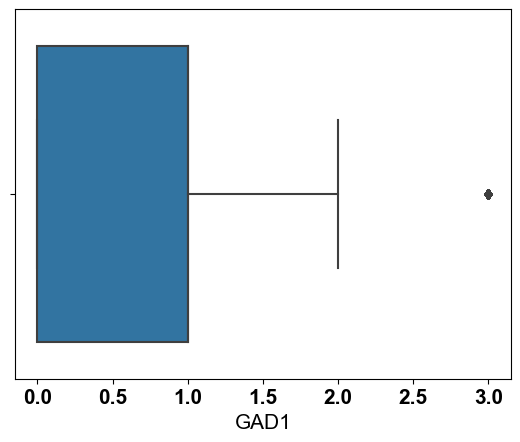

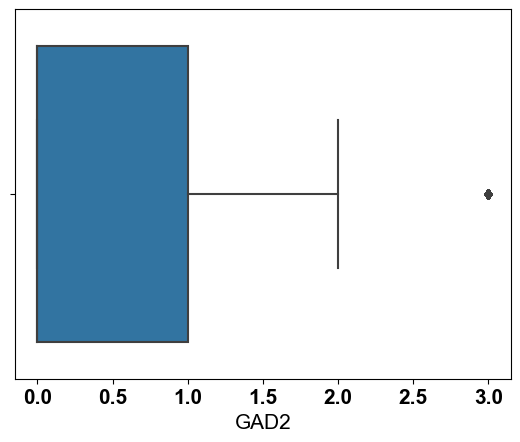

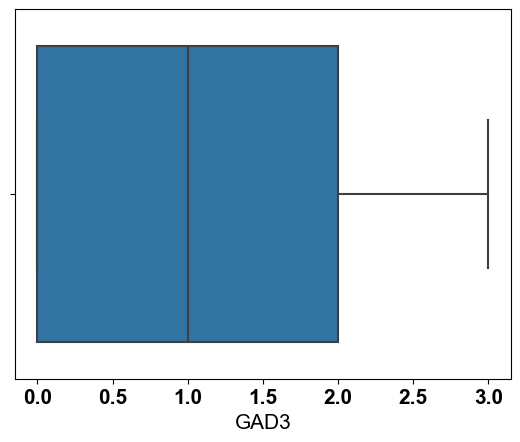

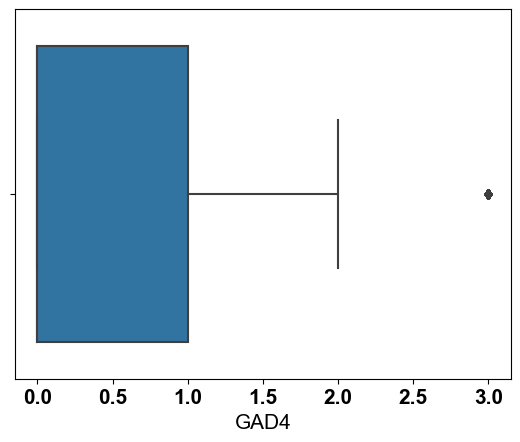

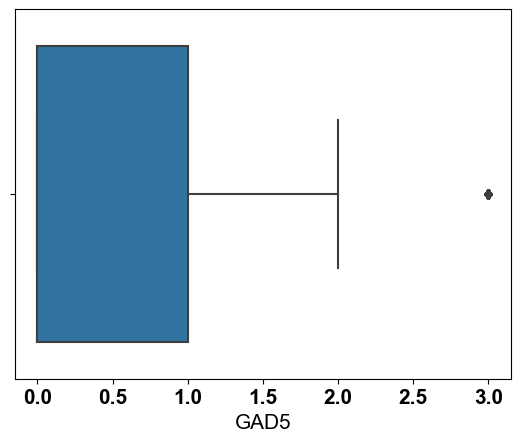

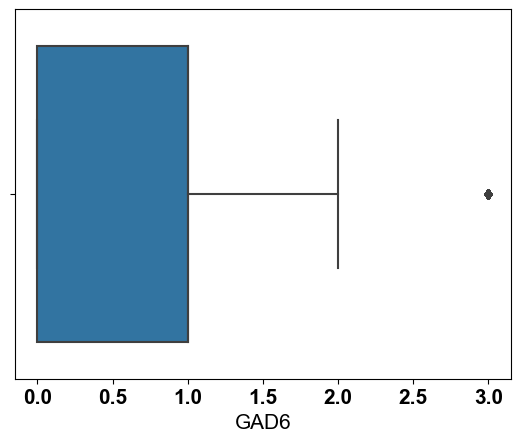

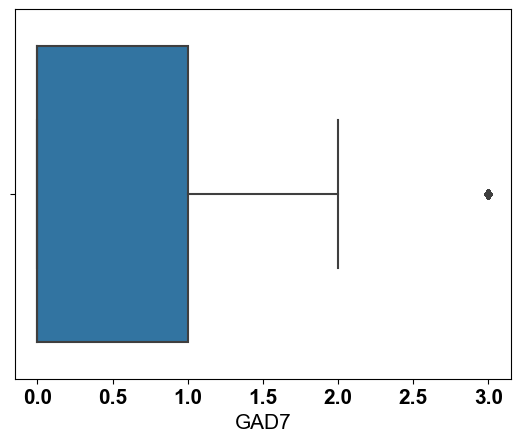

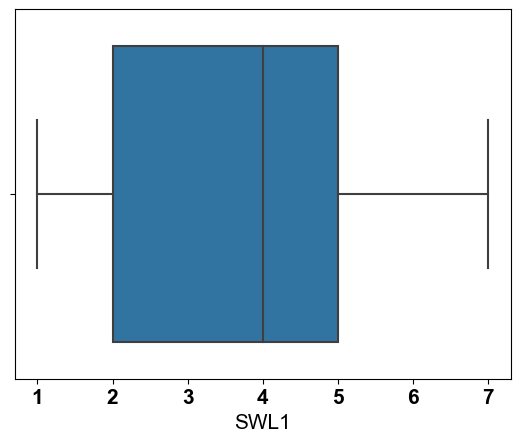

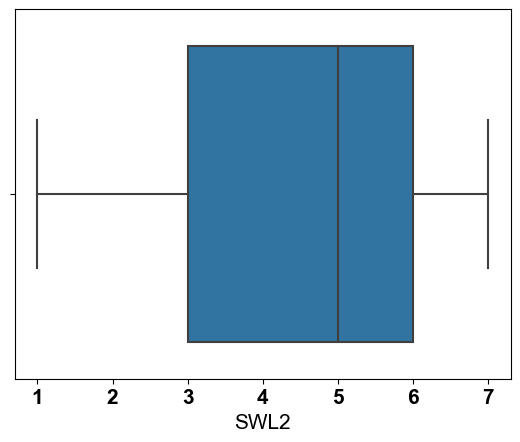

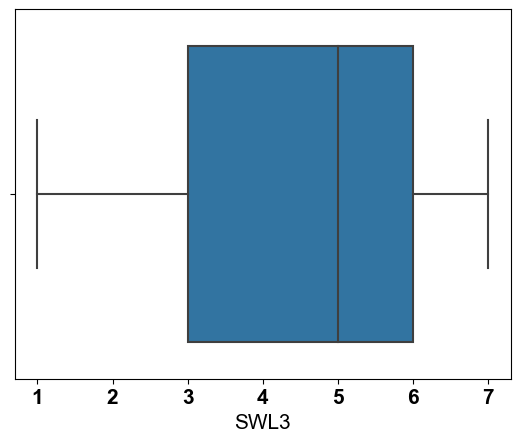

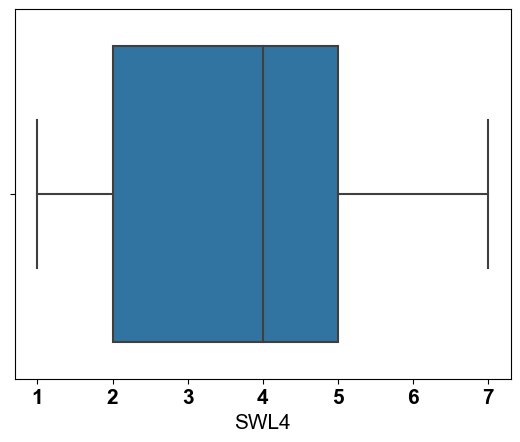

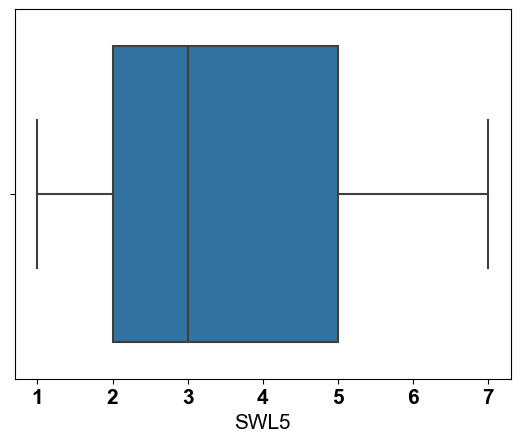

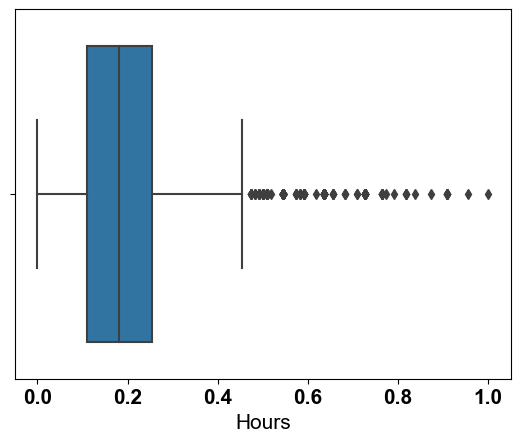

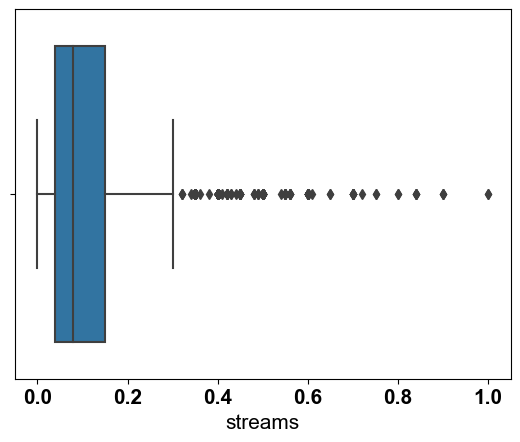

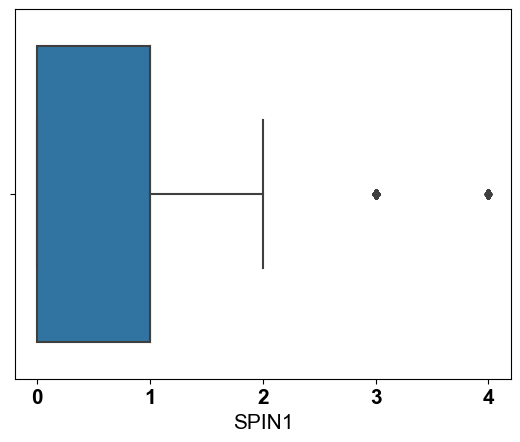

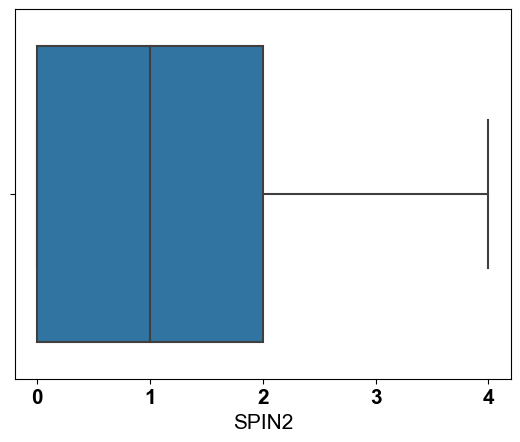

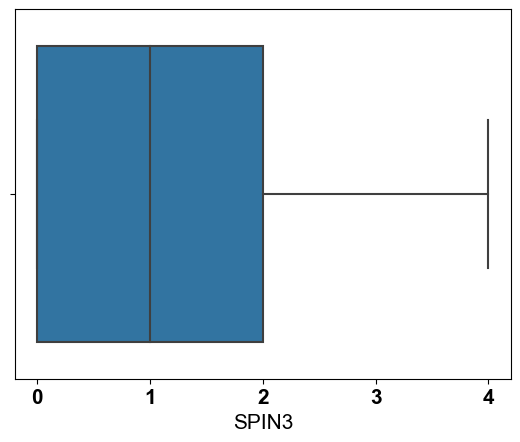

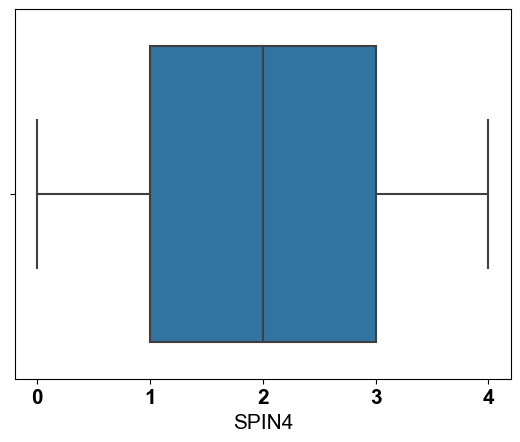

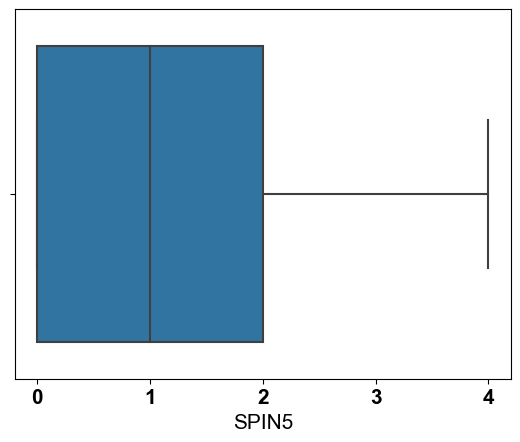

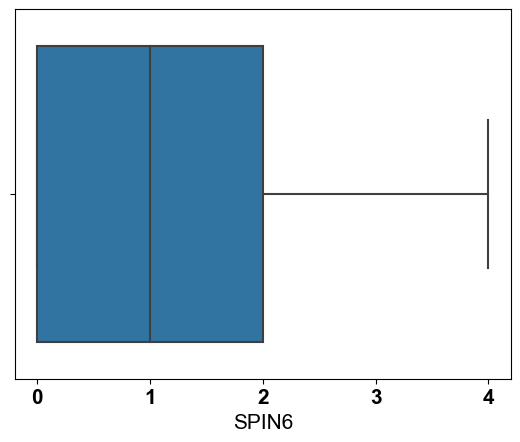

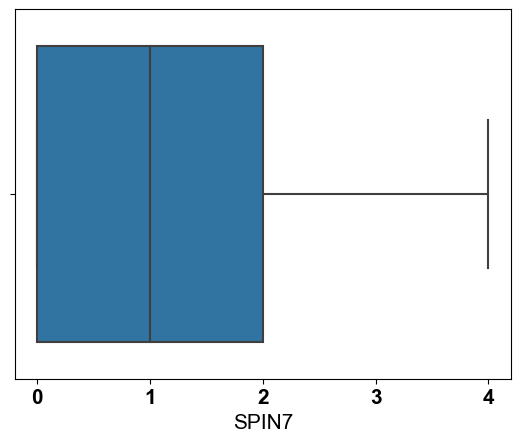

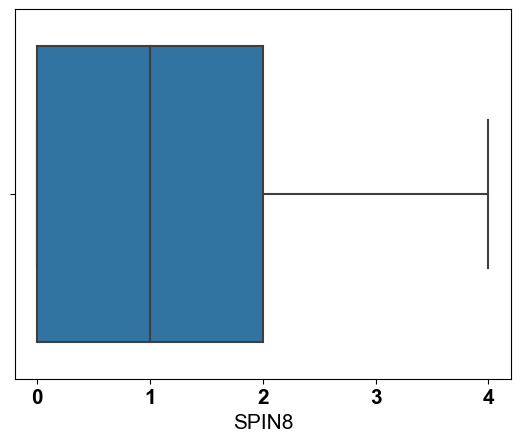

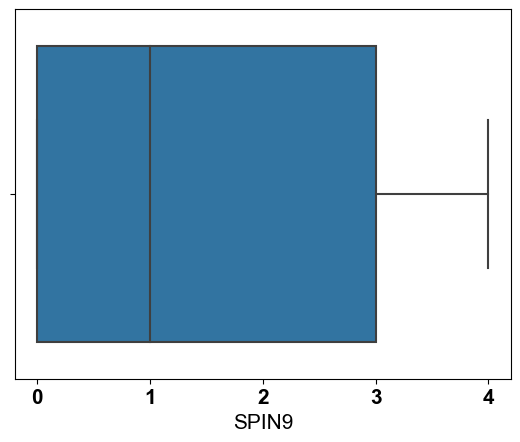

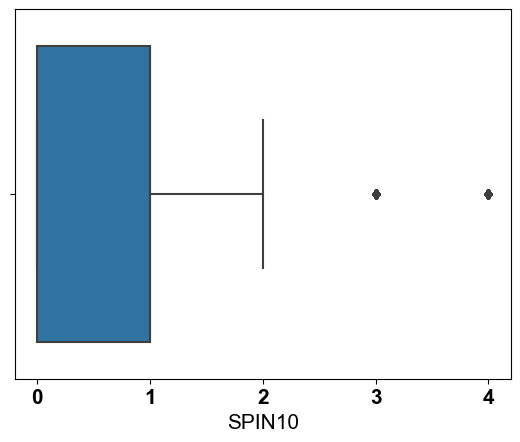

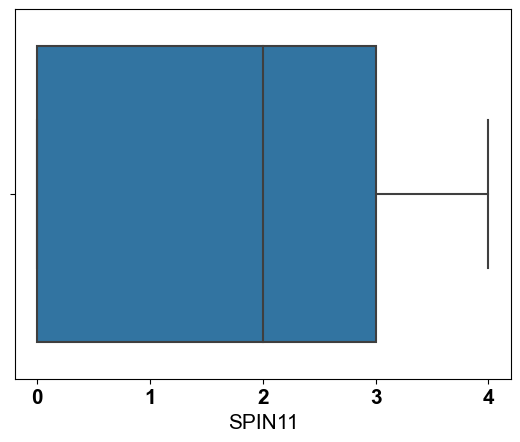

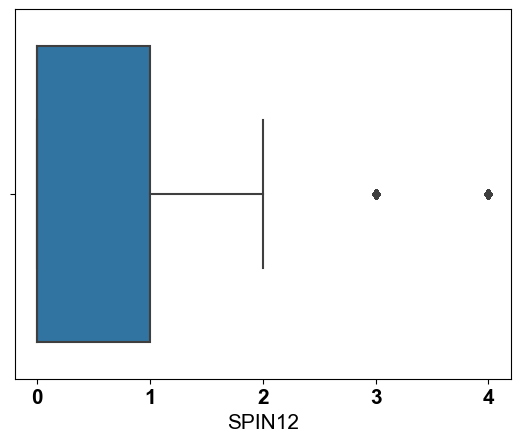

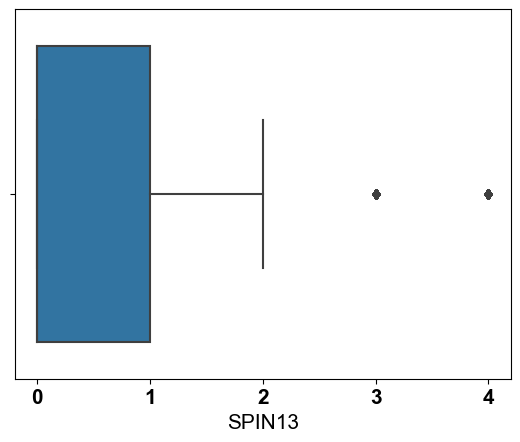

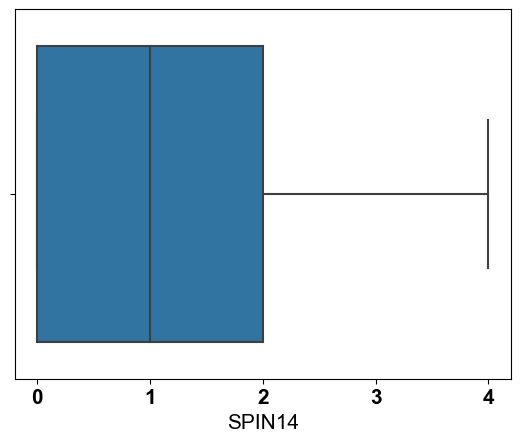

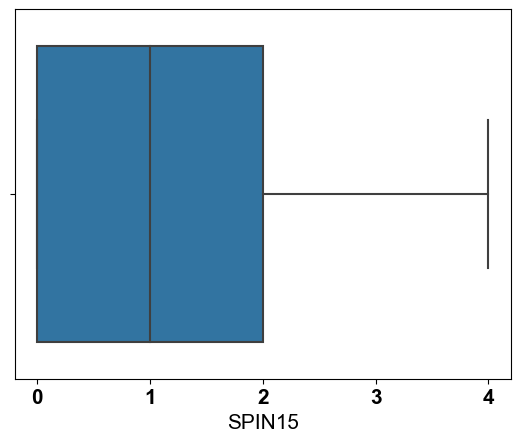

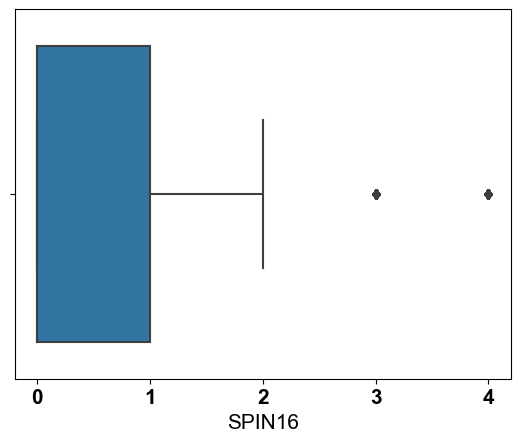

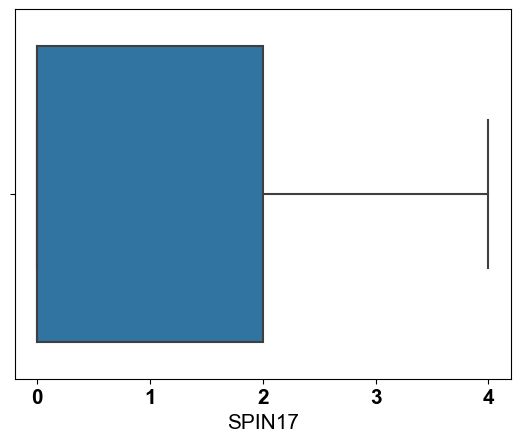

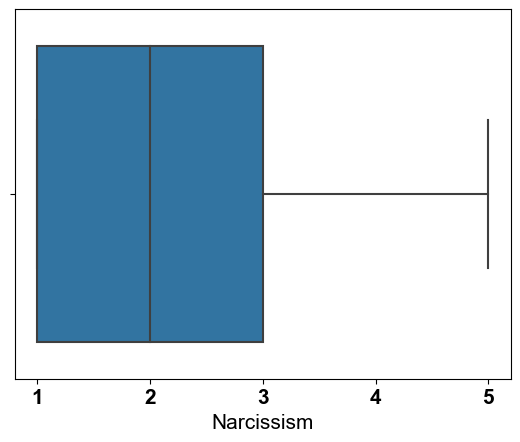

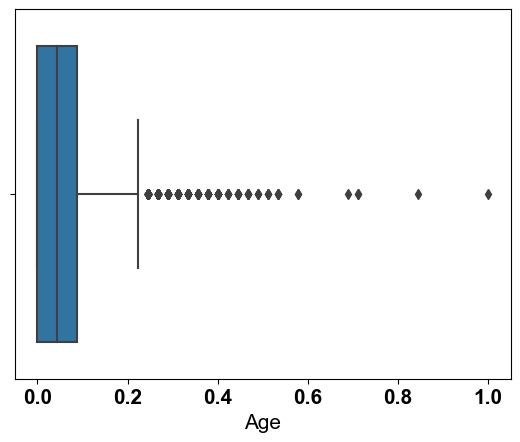

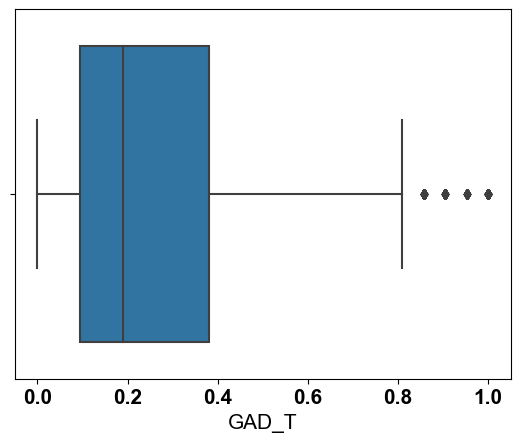

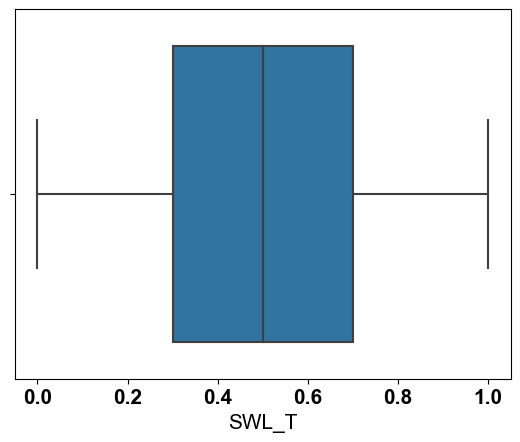

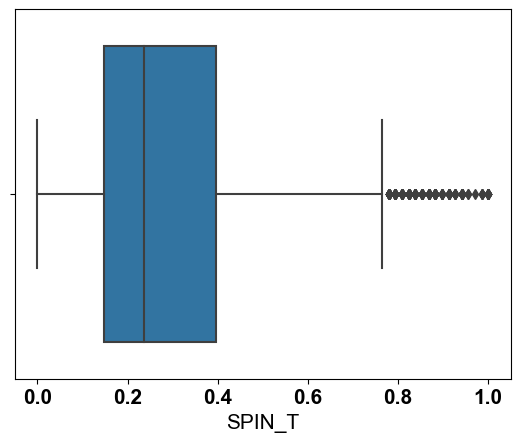

In [50]:
for i in df:
    if df[i].dtype != 'object':
        sns.boxplot(df[i])
        plt.show()

In [51]:
df.drop( df[df['Age'] > 50].index , axis = 0 , inplace=True)

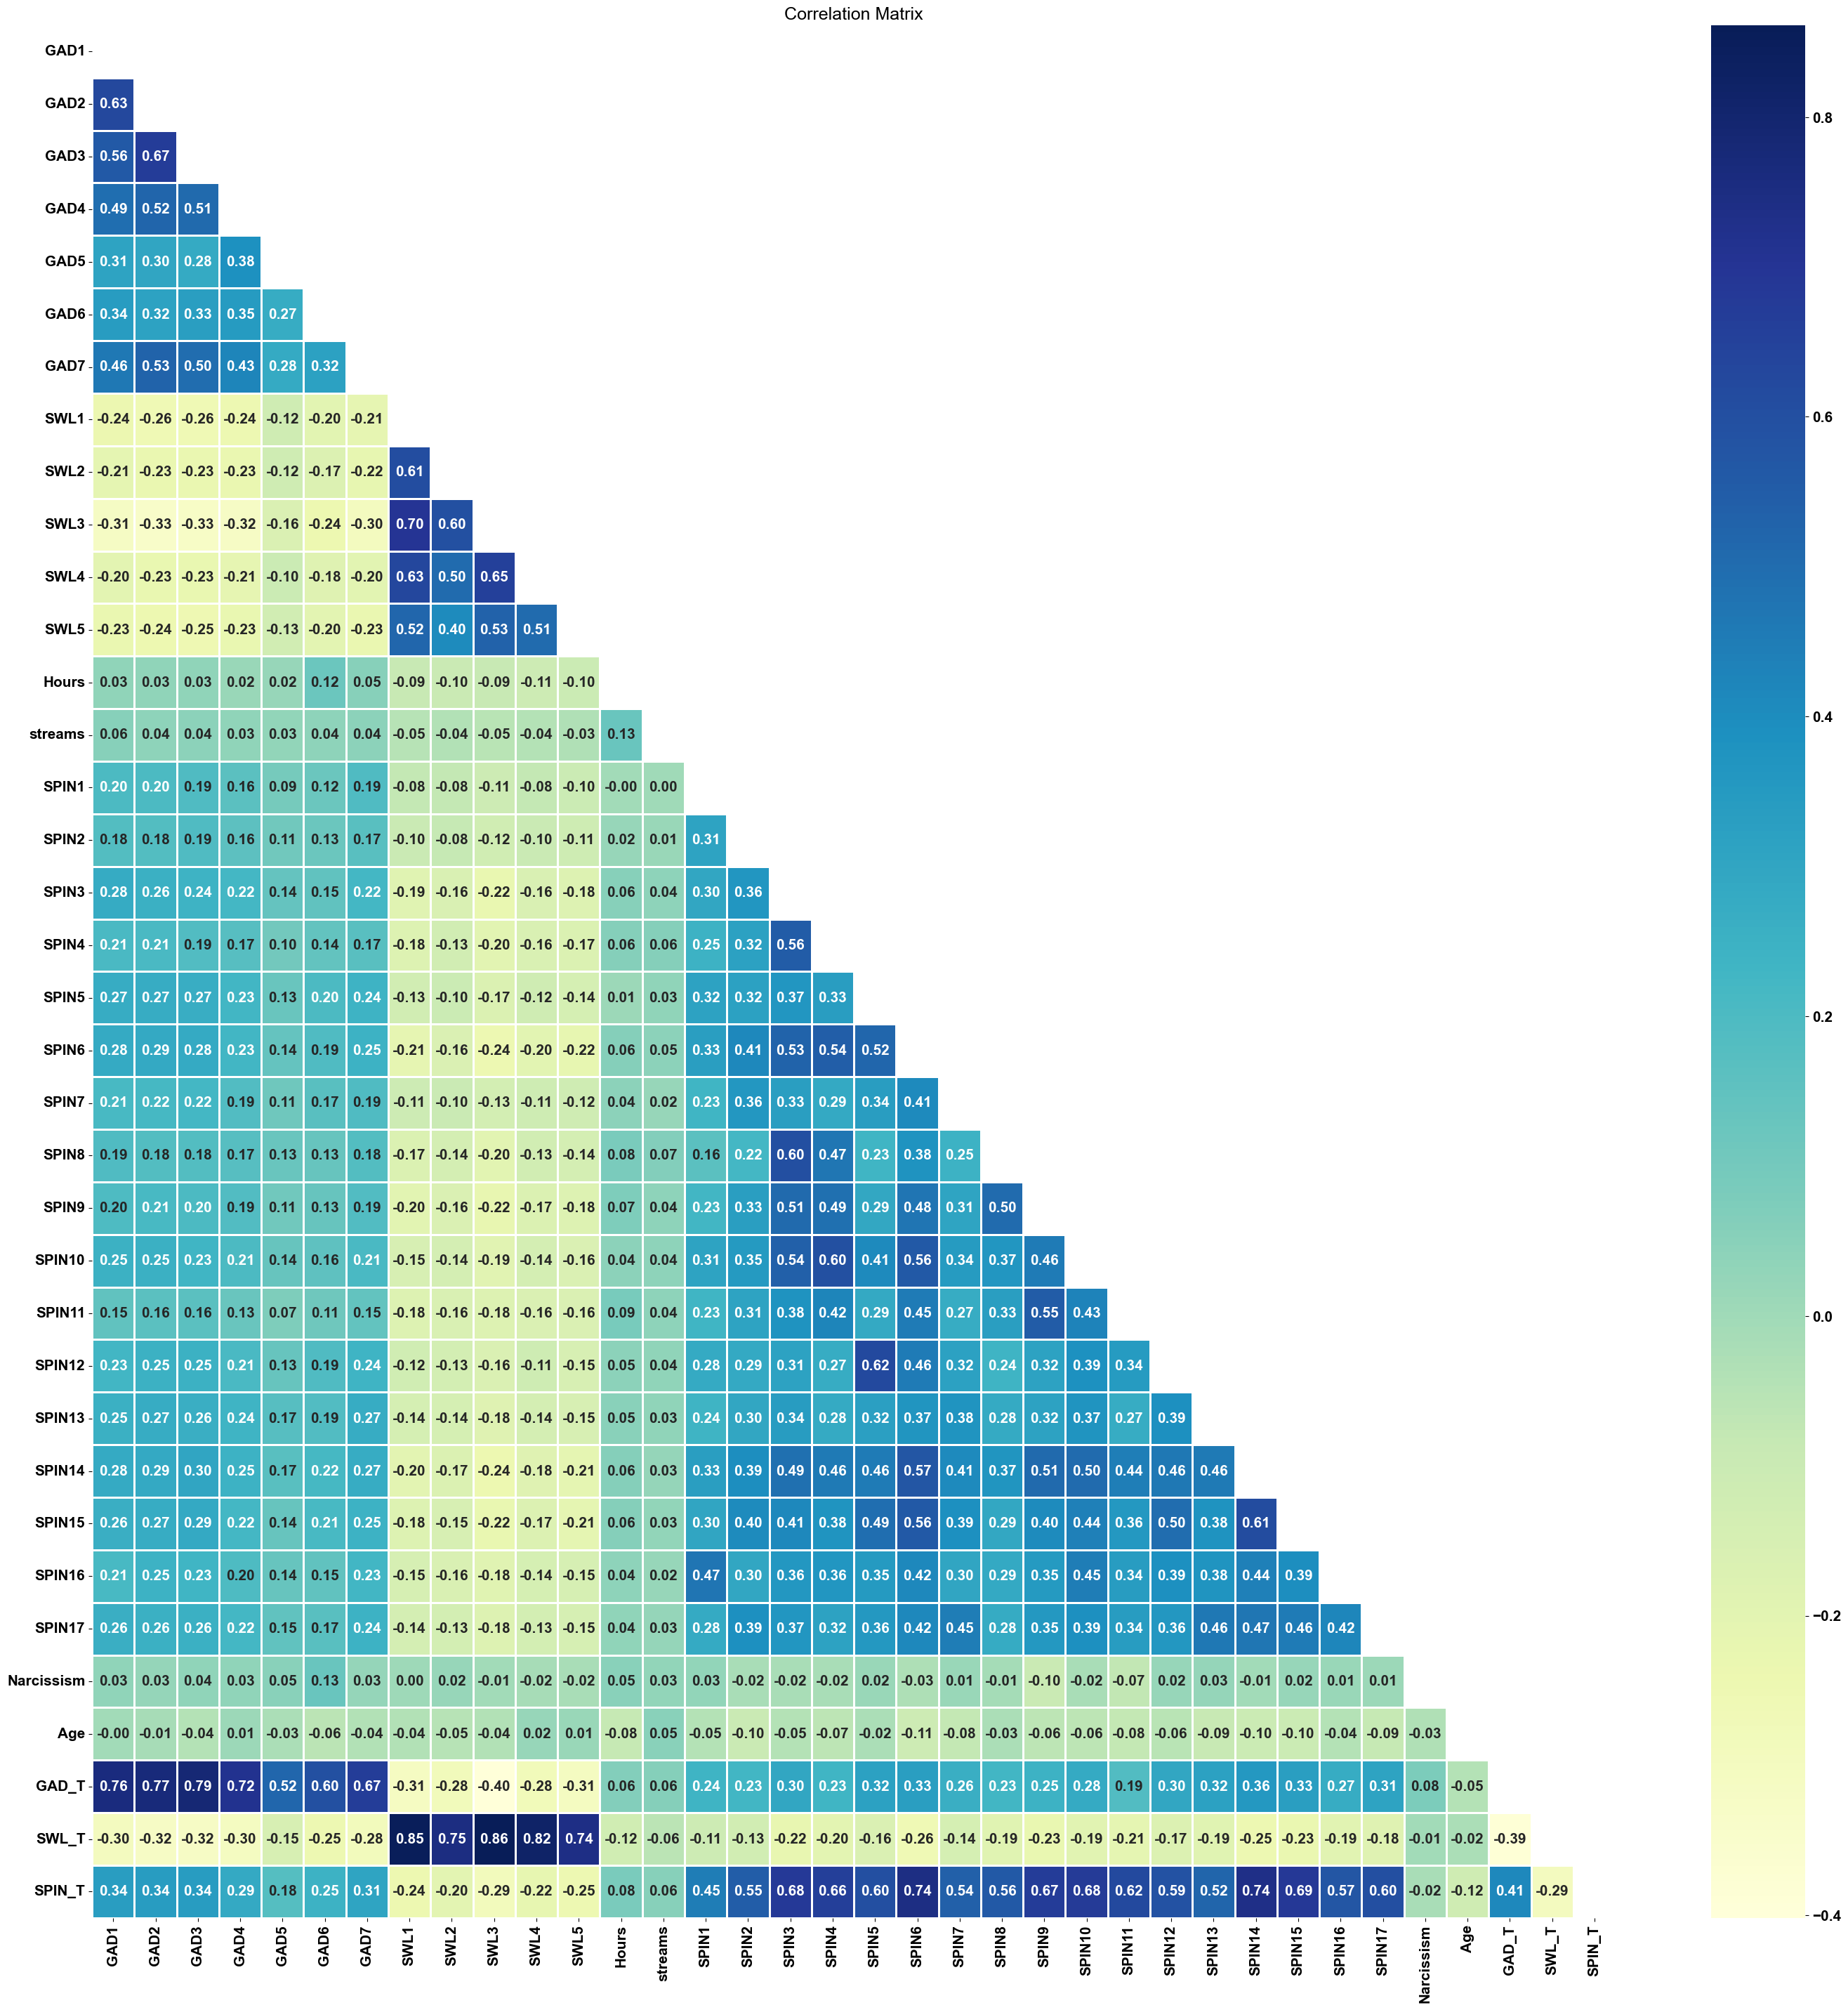

In [52]:
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (35, 35))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'Narcissism')

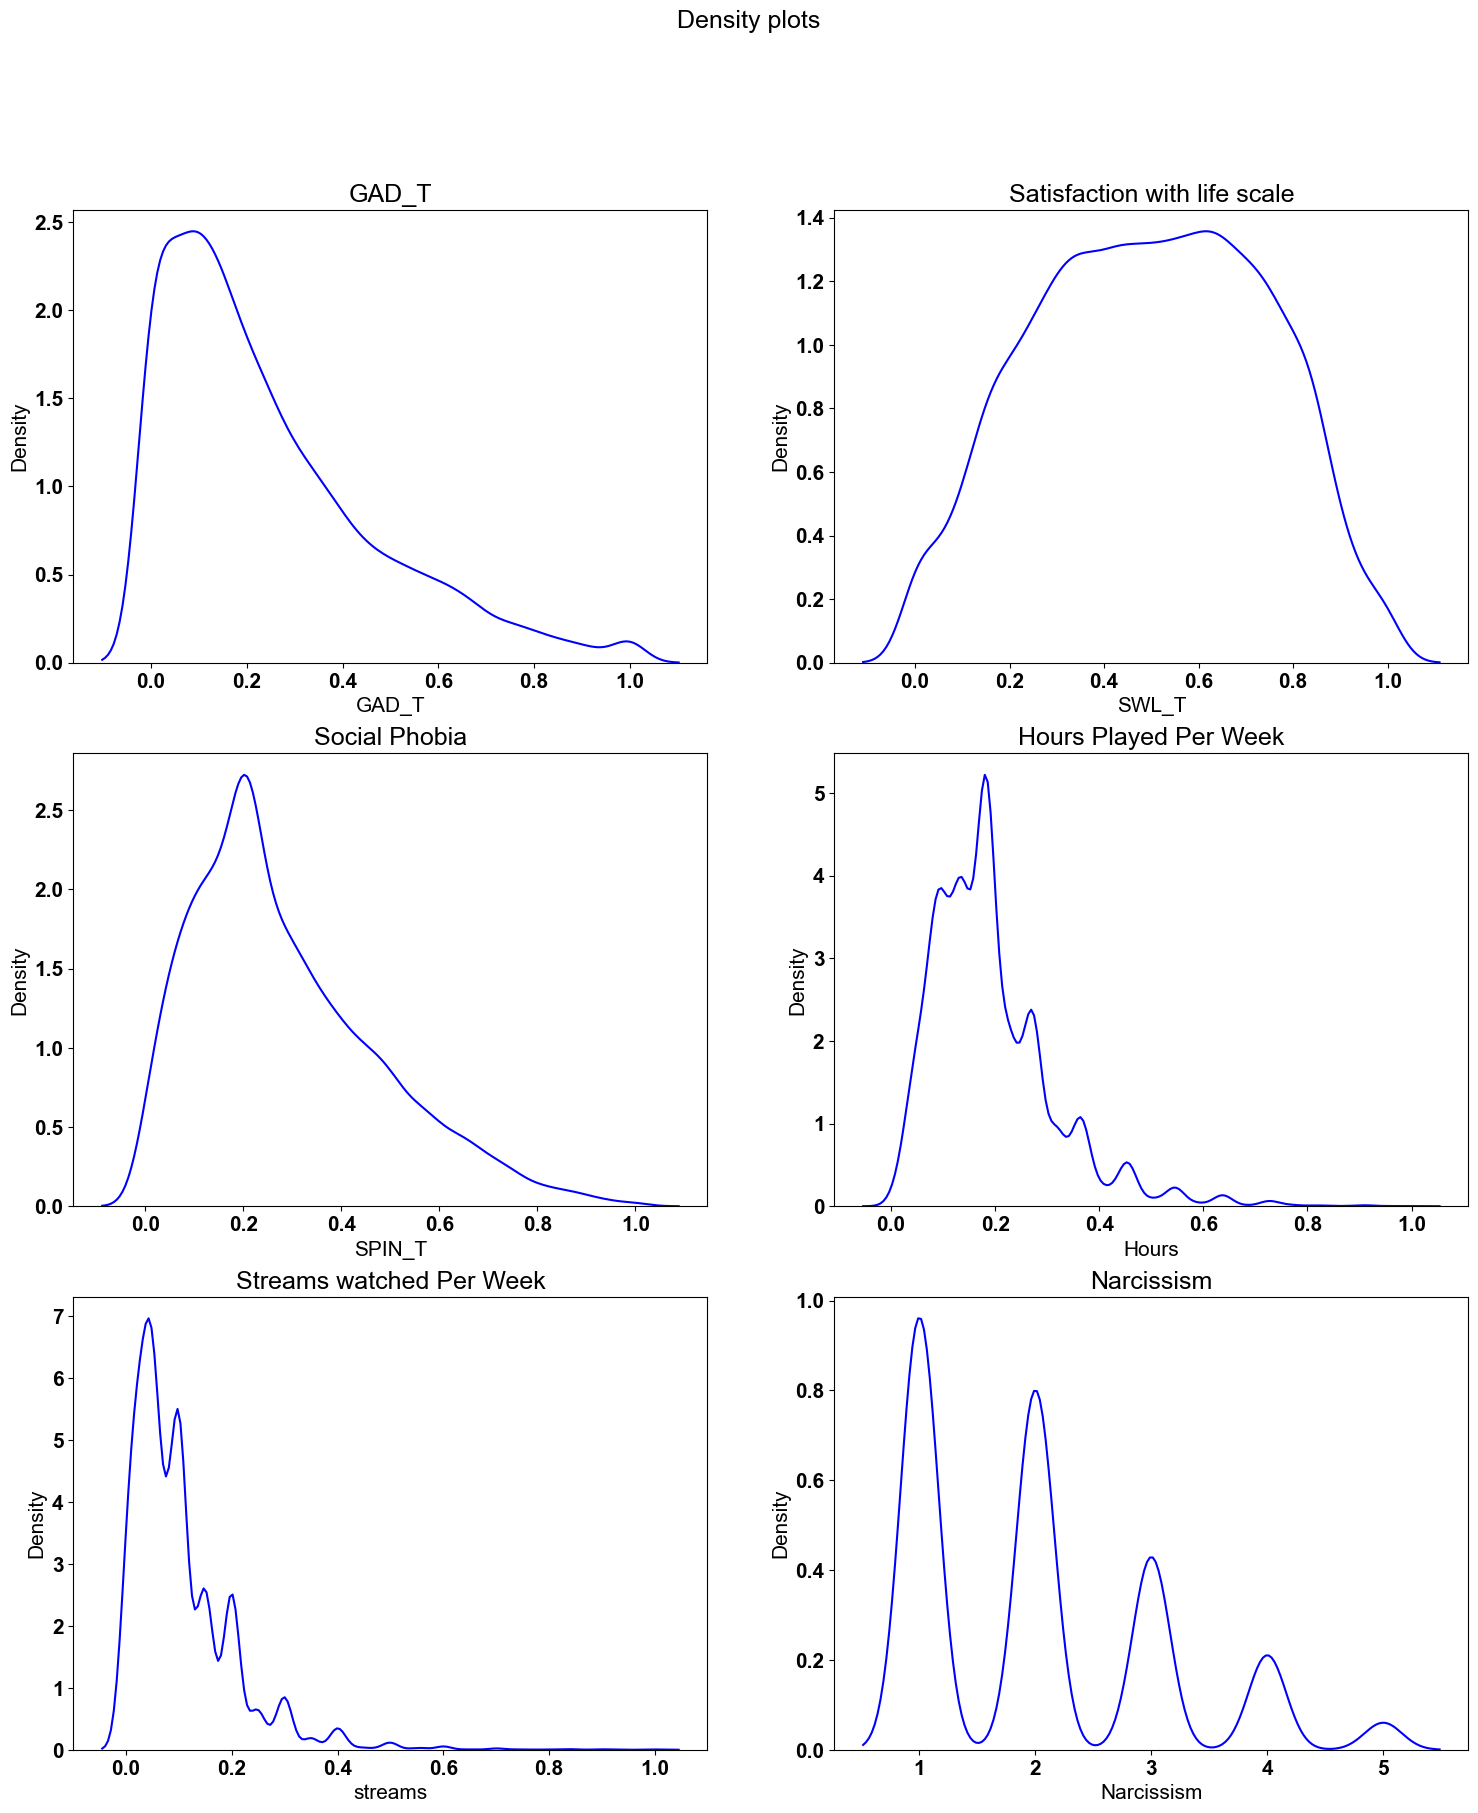

In [53]:
fig, axes = plt.subplots(3, 2, figsize=(18, 20))
fig.suptitle('Density plots')

sns.kdeplot(df['GAD_T'] , c='b' , ax = axes[0][0])
axes[0][0].set_title('GAD_T')


sns.kdeplot(df['SWL_T'],c='b' , ax = axes[0][1])
axes[0][1].set_title('Satisfaction with life scale')

sns.kdeplot(df['SPIN_T'],c='b' , ax = axes[1][0])
axes[1][0].set_title('Social Phobia')


sns.kdeplot(df['Hours'],c='b' , ax = axes[1][1])
axes[1][1].set_title('Hours Played Per Week')

sns.kdeplot(df.streams,c='b' , ax = axes[2][0])
axes[2][0].set_title('Streams watched Per Week')

sns.kdeplot(df['Narcissism'],c='b' , ax = axes[2][1])
axes[2][1].set_title('Narcissism')

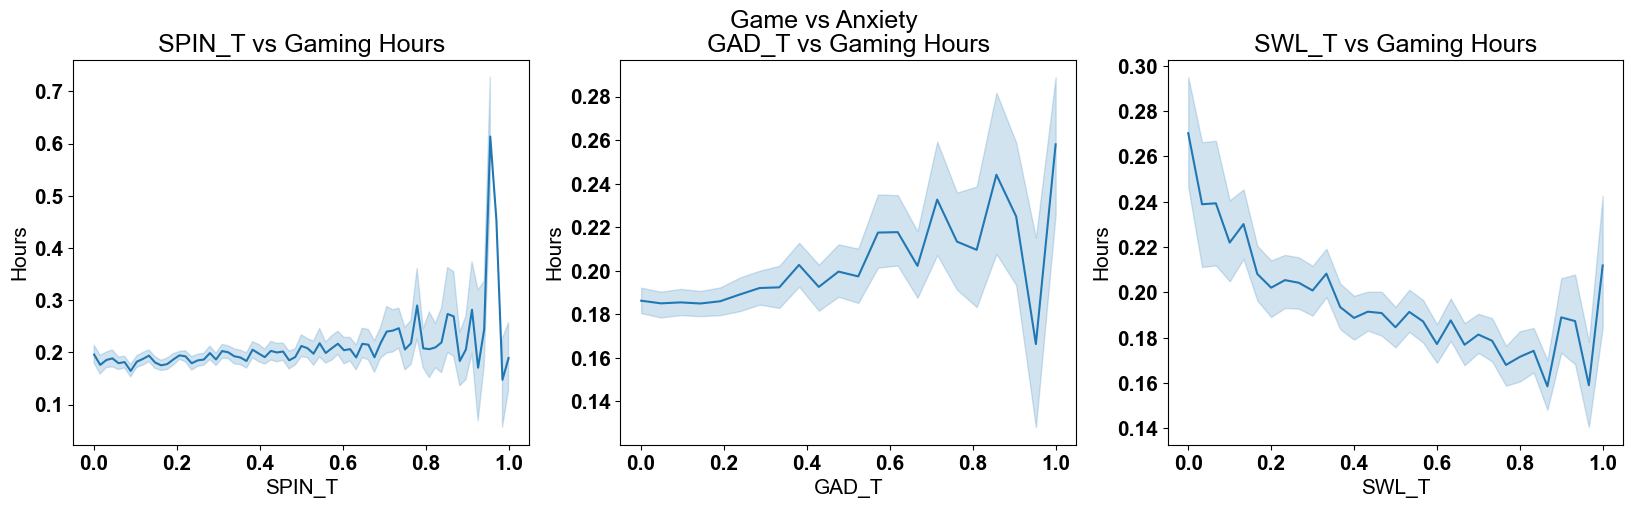

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5) )
fig.suptitle('Game vs Anxiety')
labels = ['SPIN_T', 'GAD_T' , 'SWL_T']

for count, ele in enumerate(labels):
    sns.lineplot(x=ele , y="Hours", data=df , ax = axes[count])
    axes[count].set_title(f"{ele} vs Gaming Hours")


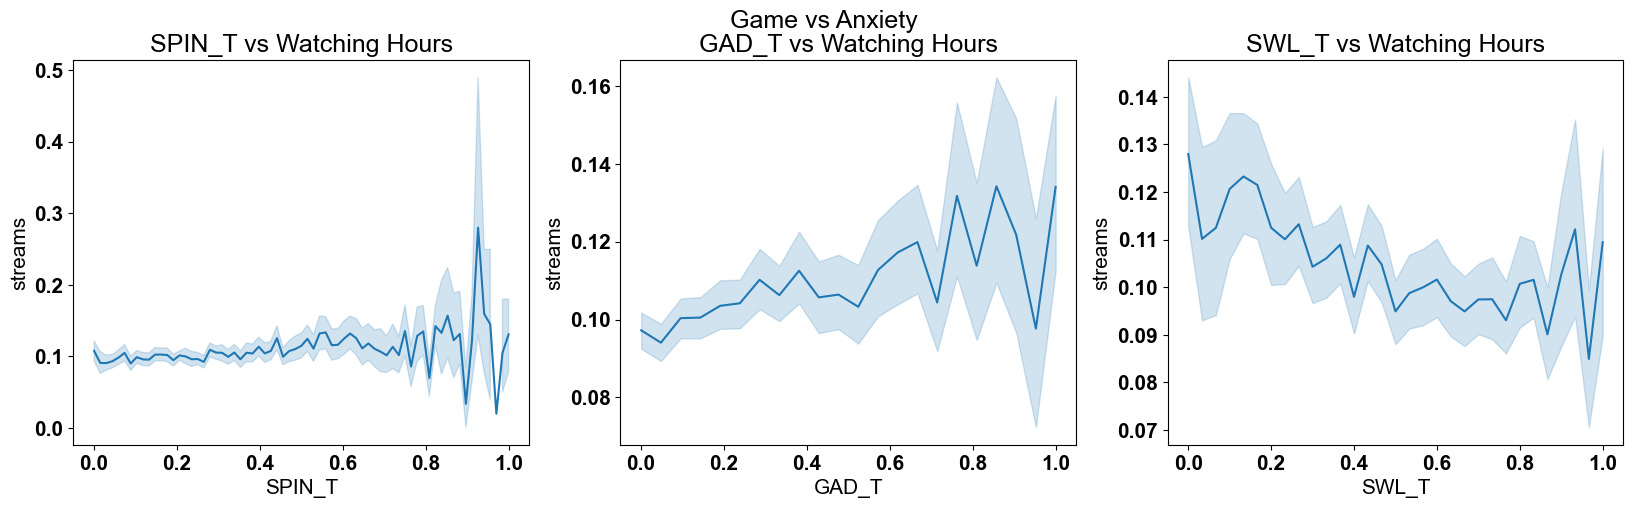

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5) )
fig.suptitle('Game vs Anxiety')
labels = ['SPIN_T', 'GAD_T' , 'SWL_T']

for count, ele in enumerate(labels):
    sns.lineplot(x=ele , y="streams", data=df , ax = axes[count])
    axes[count].set_title(f"{ele} vs Watching Hours")

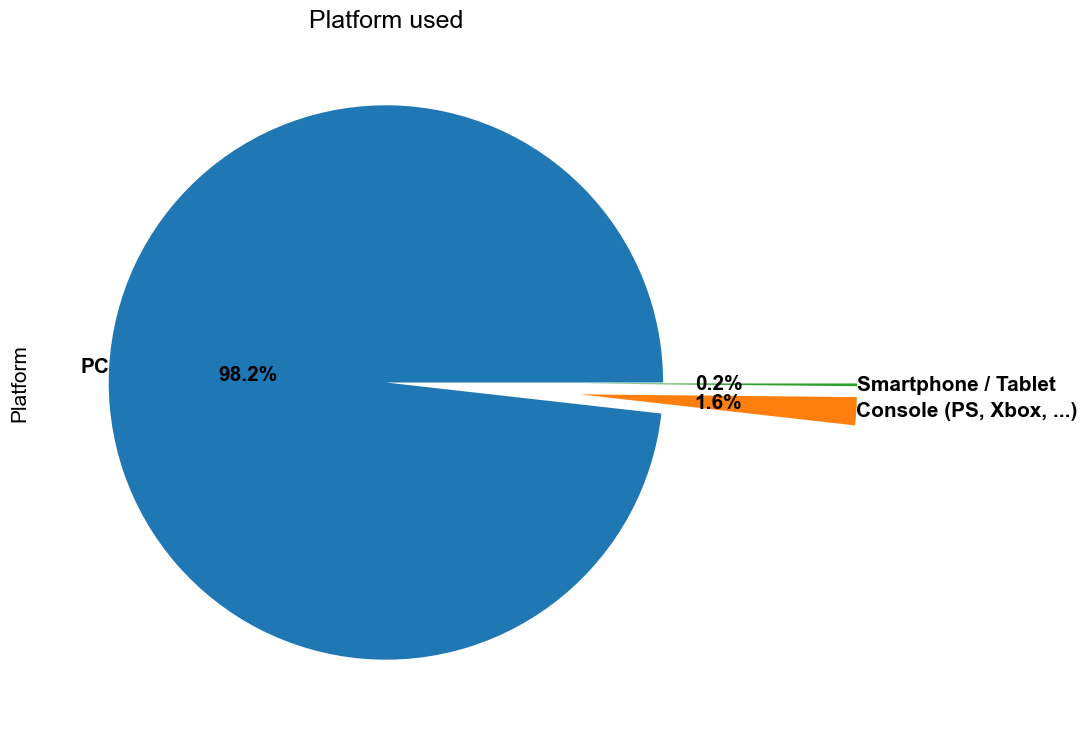

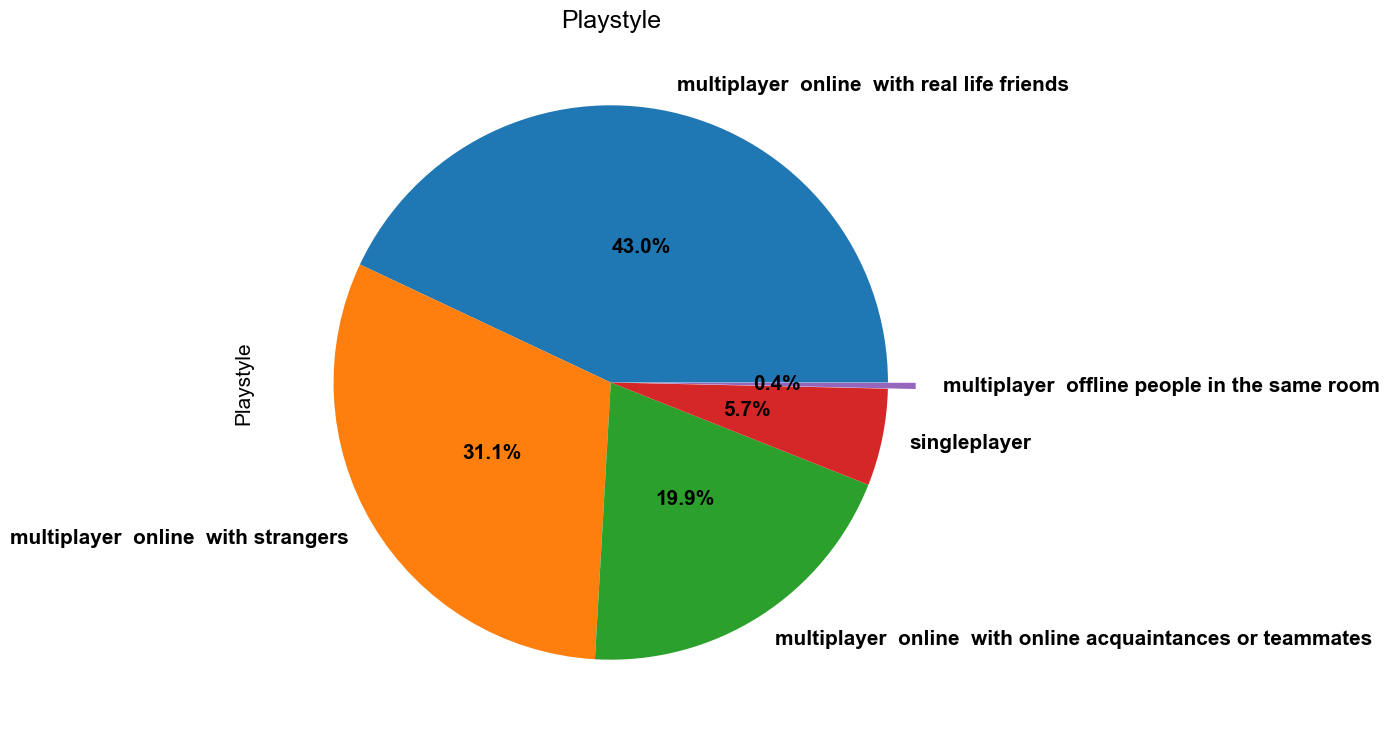

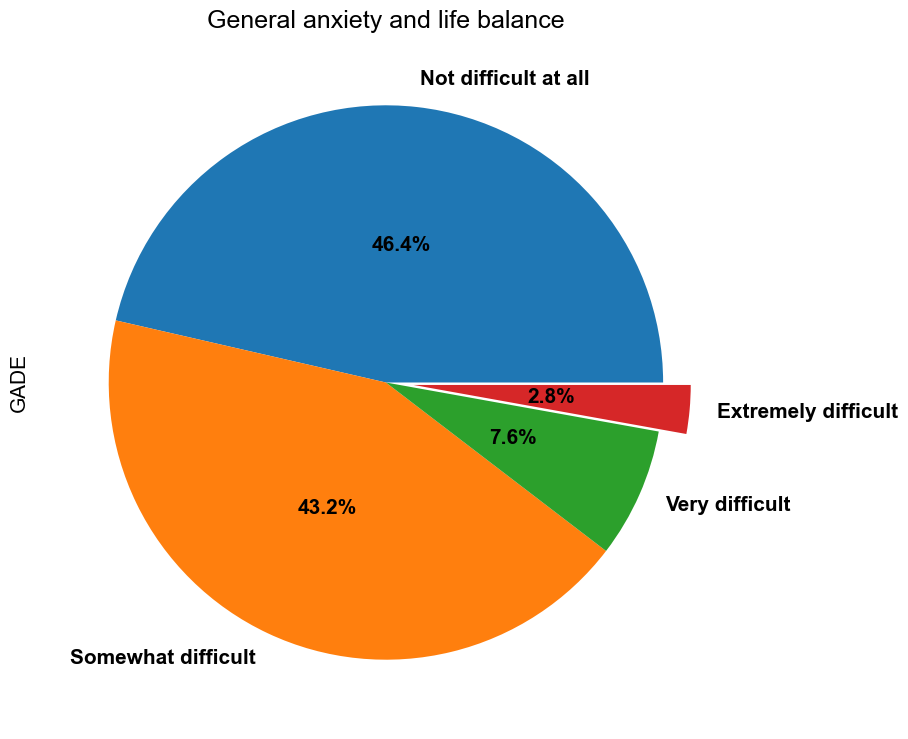

In [56]:
plt.figure(figsize=(9,9))
myexplode = [0, 0.7, 0.7]
df.Platform.value_counts().plot(kind = 'pie' , autopct='%1.1f%%' , pctdistance=0.5, labeldistance=1 , explode=myexplode )
plt.title("Platform used")
plt.show()

plt.figure(figsize=(9,9))
myexplode = [0,0,0,0,0.1]
df.Playstyle.value_counts().head(5).plot(kind = 'pie' , autopct='%1.1f%%' , pctdistance=0.5 , explode=myexplode )
plt.title("Playstyle")
plt.show()

plt.figure(figsize=(9,9))
myexplode = [0,0,0,0.1]
df.GADE.value_counts().head(5).plot(kind = 'pie' , autopct='%1.1f%%' , pctdistance=0.5 , explode=myexplode )
plt.title("General anxiety and life balance")
plt.show()

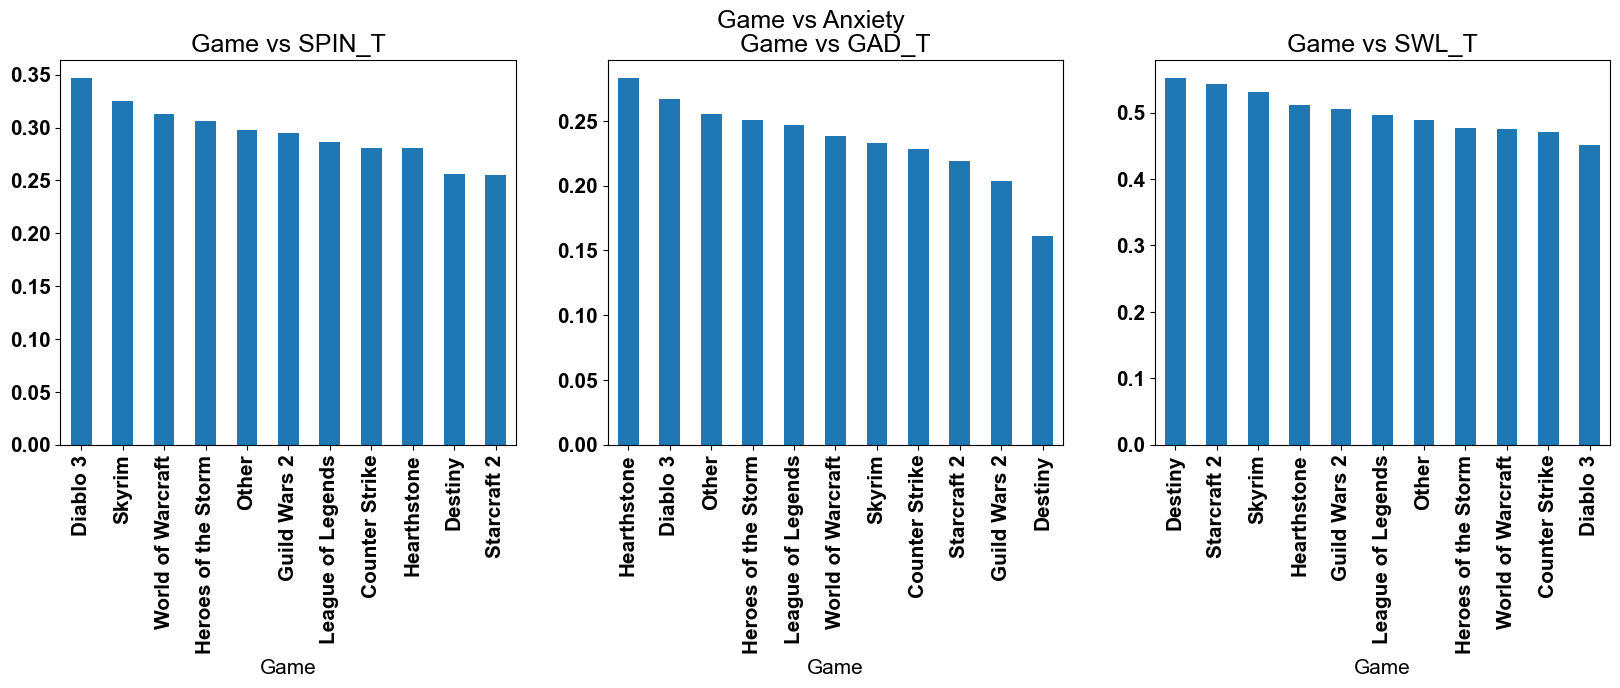

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5) )
fig.suptitle('Game vs Anxiety')
labels = ['SPIN_T', 'GAD_T' , 'SWL_T']

for count, ele in enumerate(labels):
    df.groupby('Game')[ele].mean().sort_values(ascending=False).plot(kind='bar' , ax = axes[count])
    axes[count].set_title(f"Game vs {ele}")

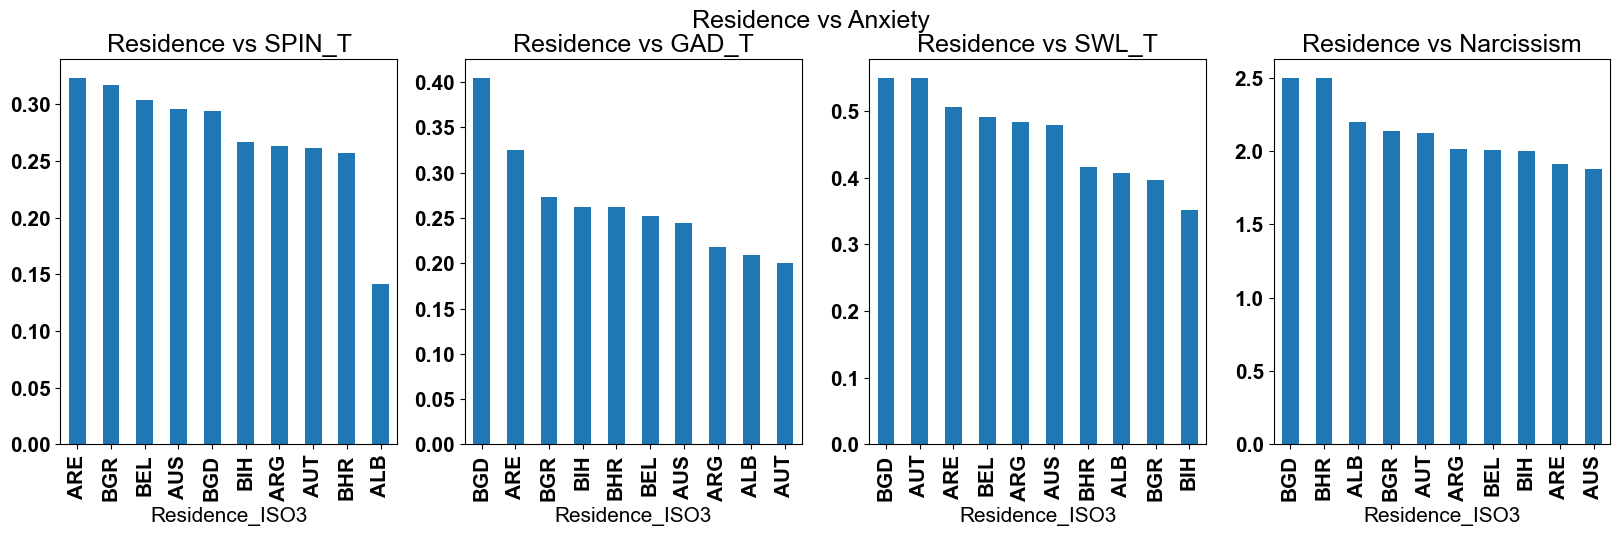

In [58]:
fig, axes = plt.subplots(1 , 4, figsize=(20, 5) )
fig.suptitle('Residence vs Anxiety')
labels = ['SPIN_T', 'GAD_T' , 'SWL_T' , 'Narcissism']

for count, ele in enumerate(labels):
    df.groupby('Residence_ISO3')[ele].mean().head(10).sort_values(ascending=False).plot(kind='bar' , ax = axes[count])
    axes[count].set_title(f"Residence vs {ele}")

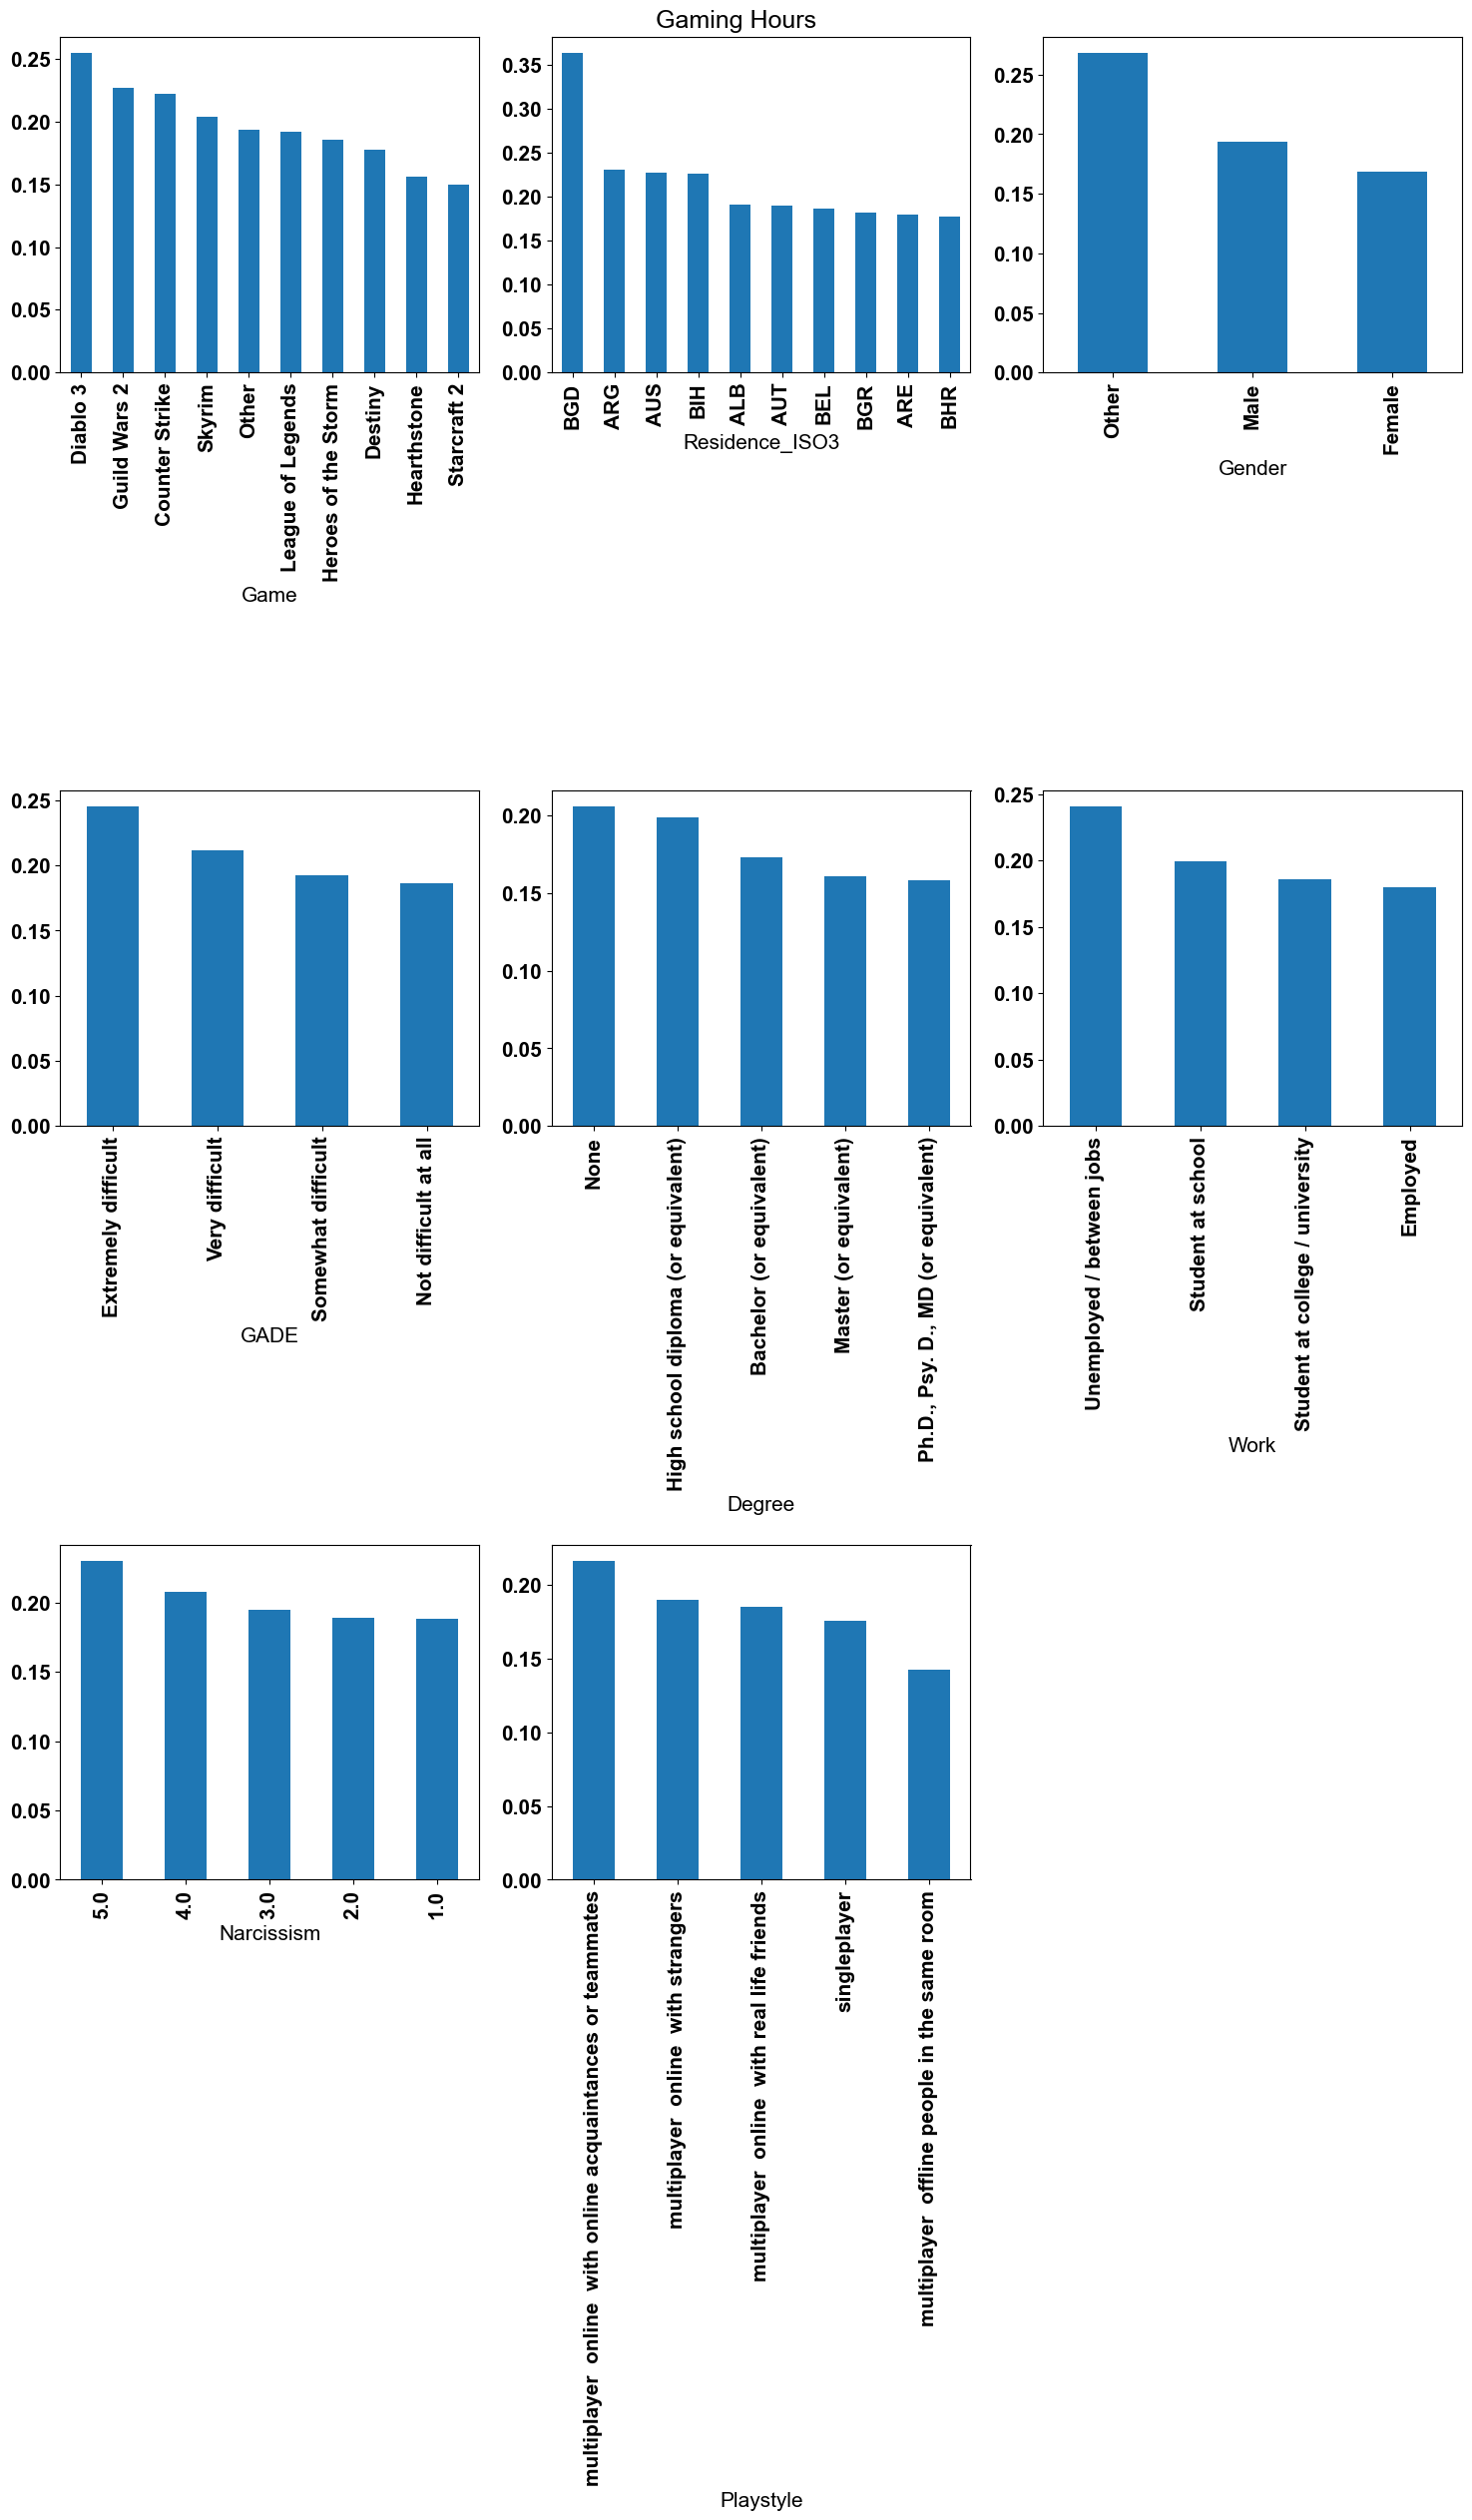

In [59]:
labels = ['Game', 'Residence_ISO3' , 'Gender','GADE' , 'Degree' , 'Work','Narcissism','Playstyle']
plt.figure(figsize=(15,20))
plt.suptitle('Gaming Hours')
for count, ele in enumerate(labels,1):
    plt.subplot(3 , 3 , count)
    plt.tight_layout()
    df.groupby(ele)['Hours'].mean().head(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

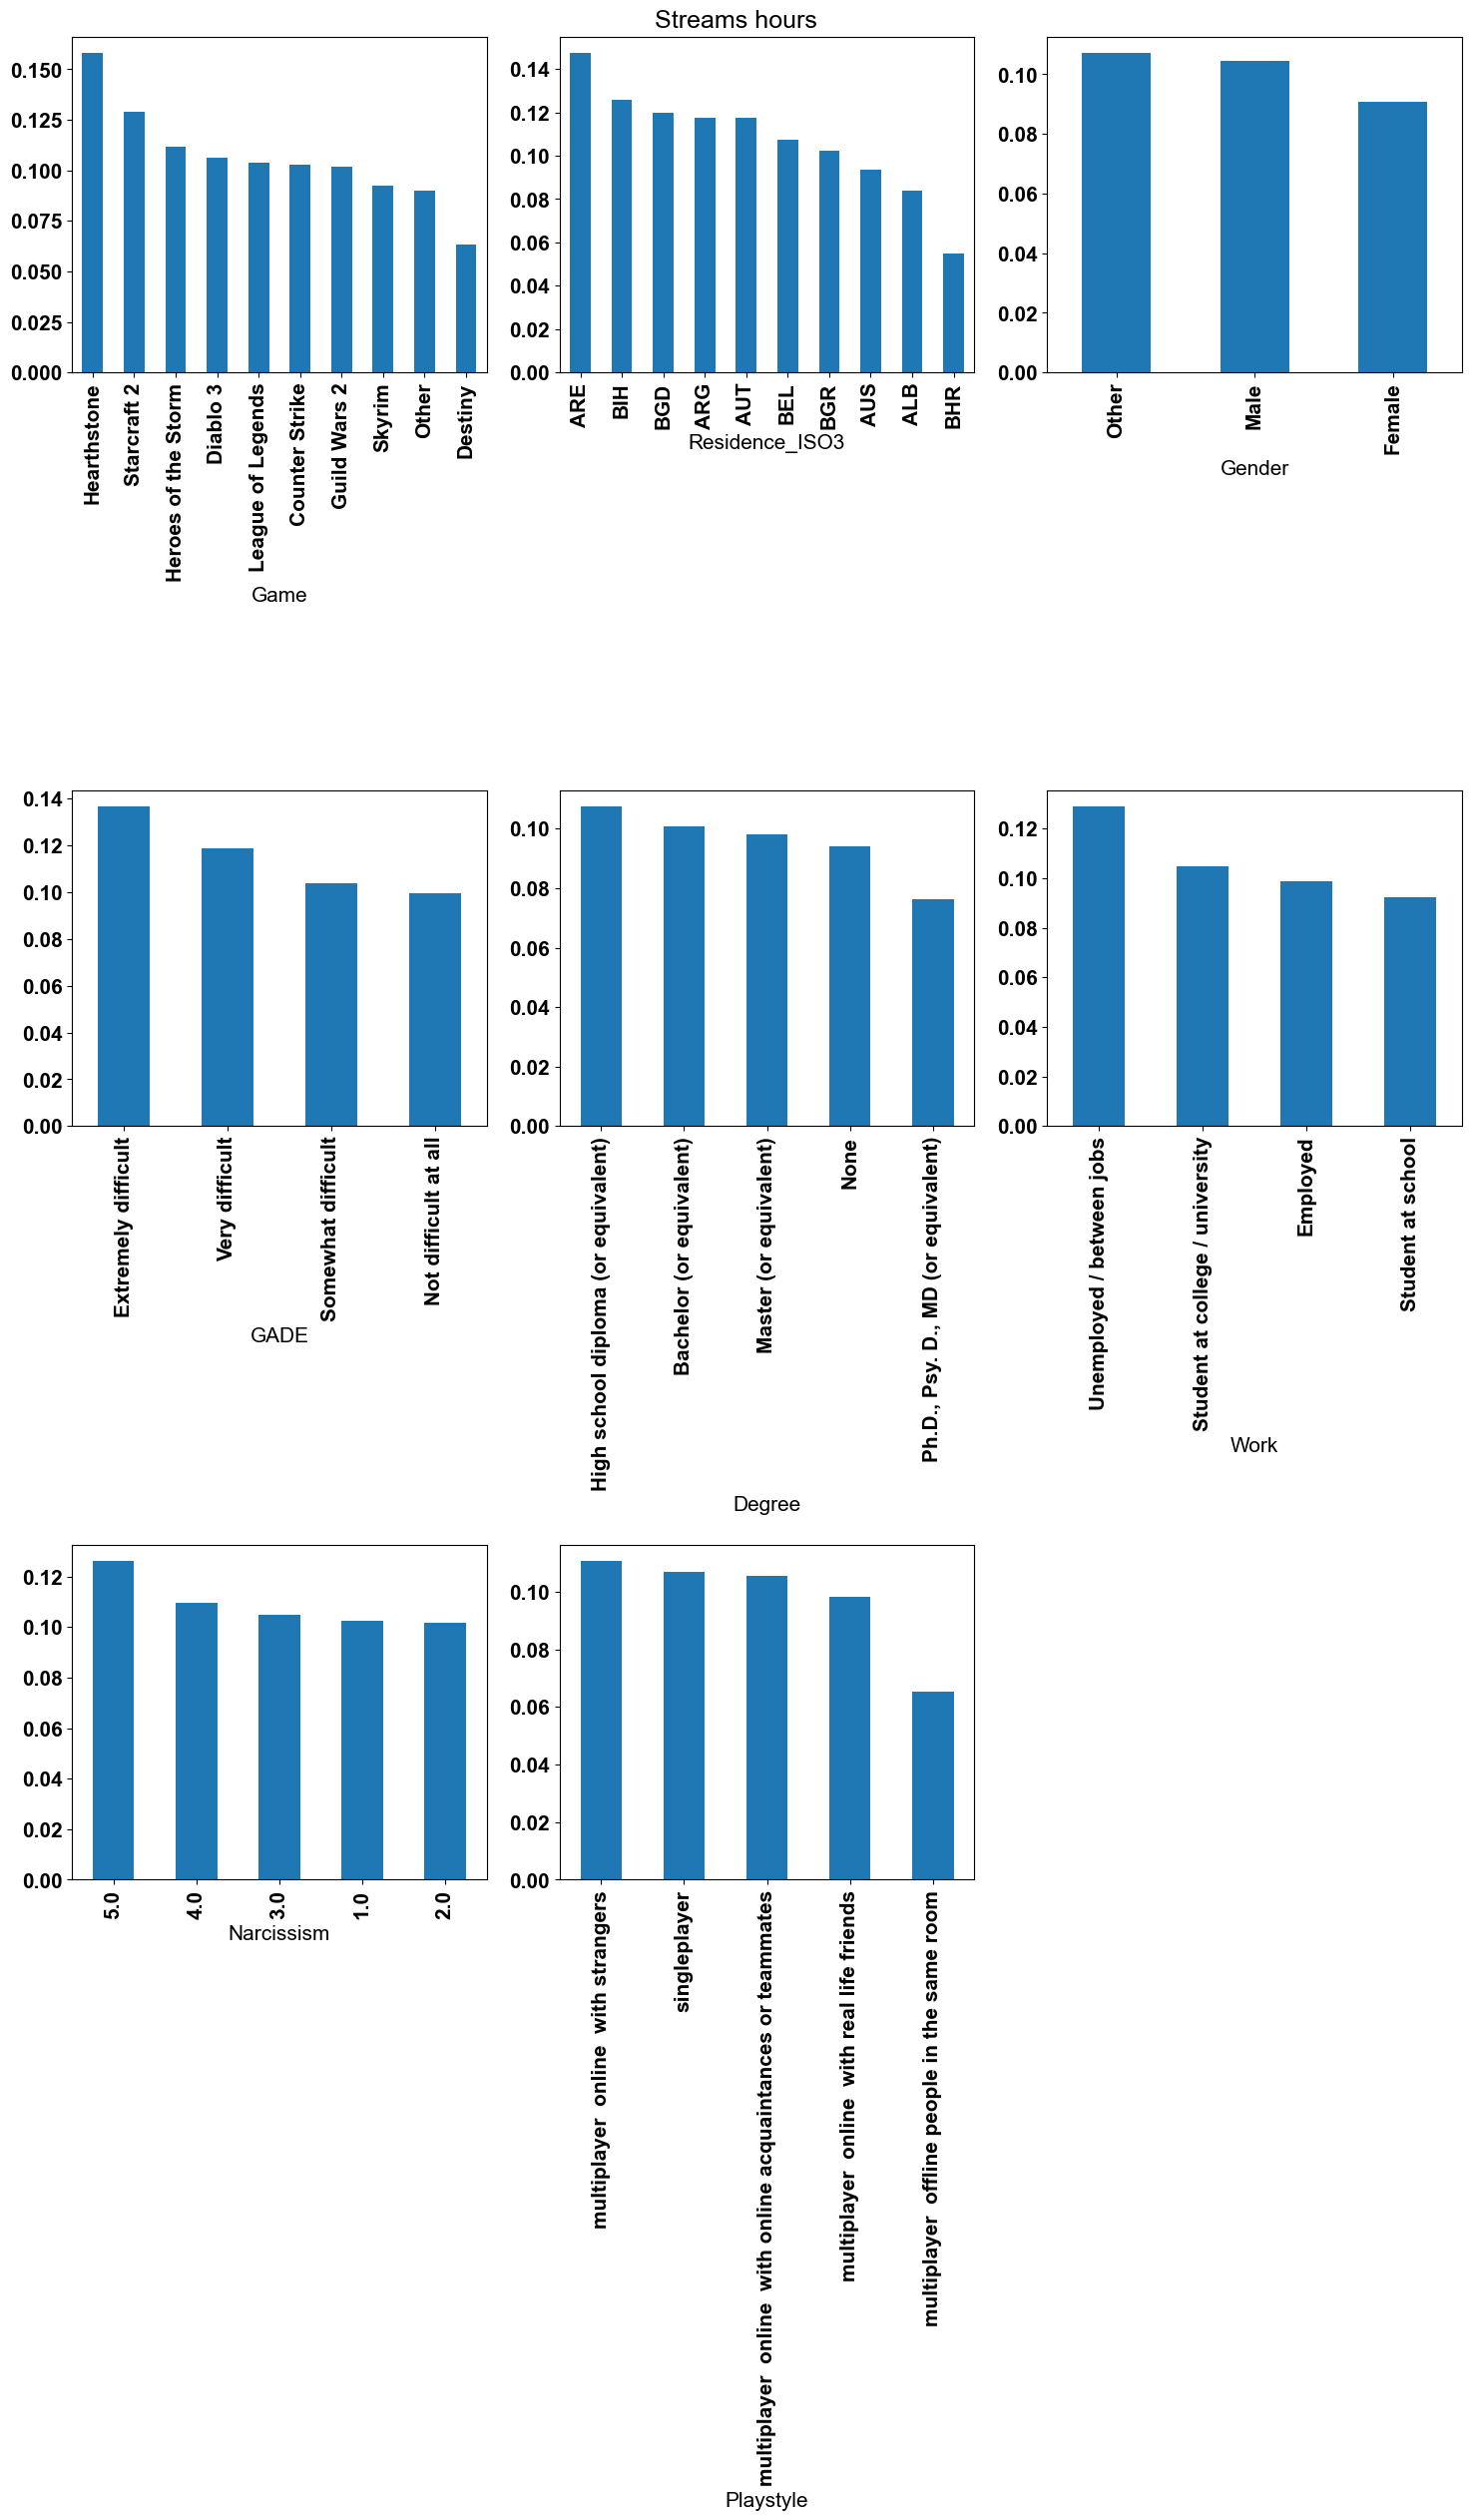

In [60]:
labels = ['Game', 'Residence_ISO3' , 'Gender','GADE' , 'Degree' , 'Work','Narcissism','Playstyle']
plt.figure(figsize=(15,20))
plt.suptitle('Streams hours')
for count, ele in enumerate(labels,1):
    plt.subplot(3 , 3 , count)
    plt.tight_layout()
    df.groupby(ele)['streams'].mean().head(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

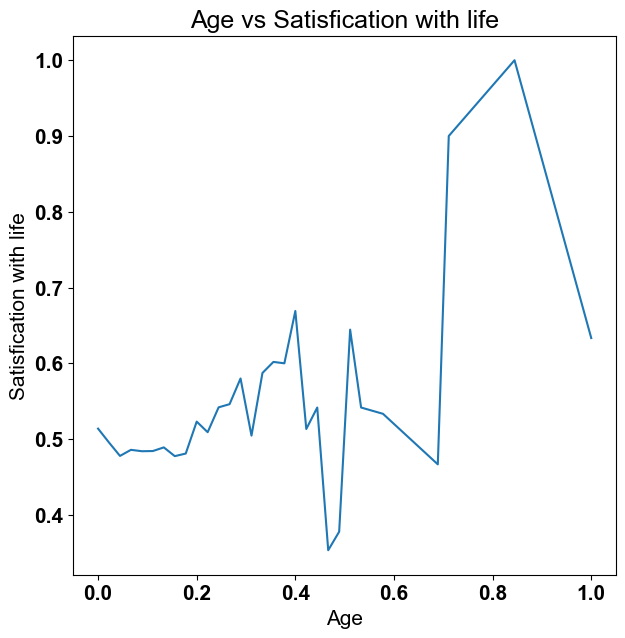

In [61]:
plt.figure(figsize=(7,7))
df.groupby('Age')['SWL_T'].mean().plot()
plt.title("Age vs Satisfication with life")
plt.xlabel("Age")
plt.ylabel("Satisfication with life");

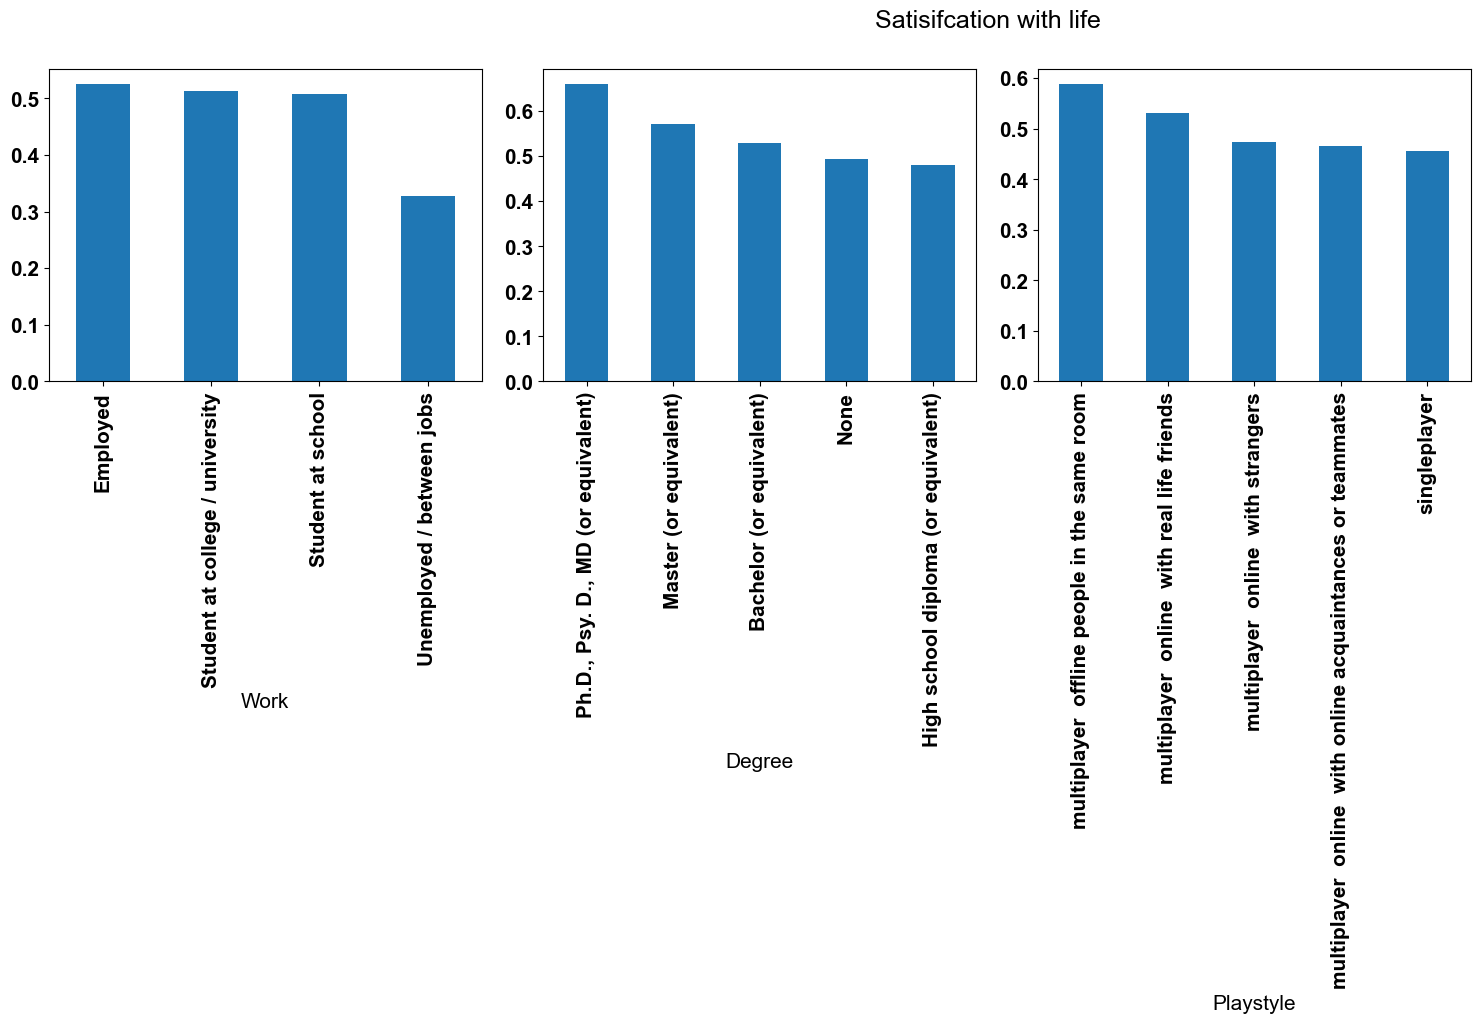

In [62]:
labels = ['Work', 'Degree' , 'Playstyle']
plt.figure(figsize=(20,8))
plt.suptitle('Satisifcation with life')
for count, ele in enumerate(labels,1):
    plt.subplot(1 , 4 , count)
    plt.tight_layout()
    df.groupby(ele)['SWL_T'].mean().head(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

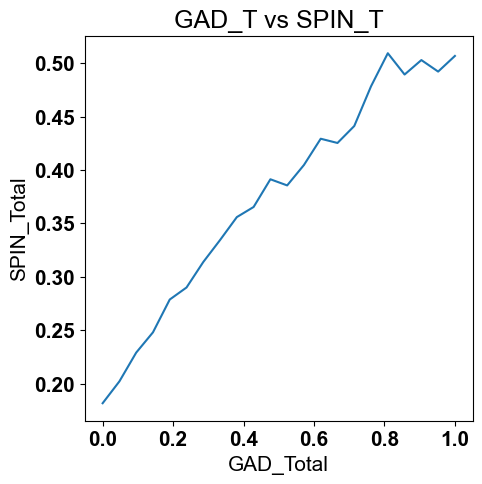

In [63]:
plt.figure(figsize=(5,5))
df.groupby('GAD_T')['SPIN_T'].mean().plot()
plt.title("GAD_T vs SPIN_T")
plt.xlabel("GAD_Total")
plt.ylabel("SPIN_Total")
plt.show()

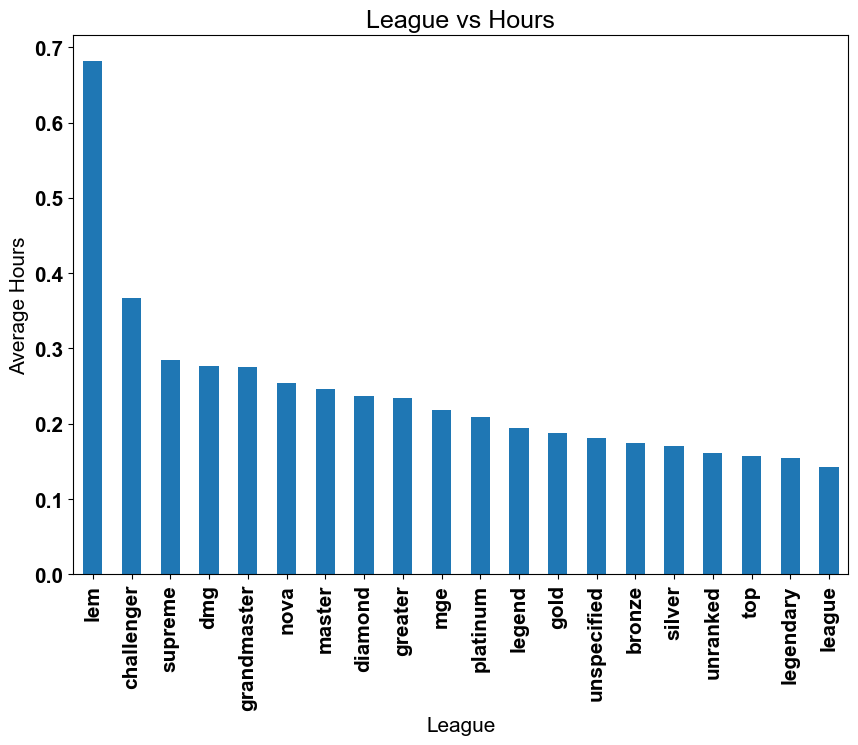

In [64]:
plt.figure(figsize=(10,7))
df.groupby('League').mean()['Hours'].sort_values(ascending=False).plot(kind='bar')
plt.title("League vs Hours")
plt.xlabel("League")
plt.ylabel("Average Hours")
plt.show()

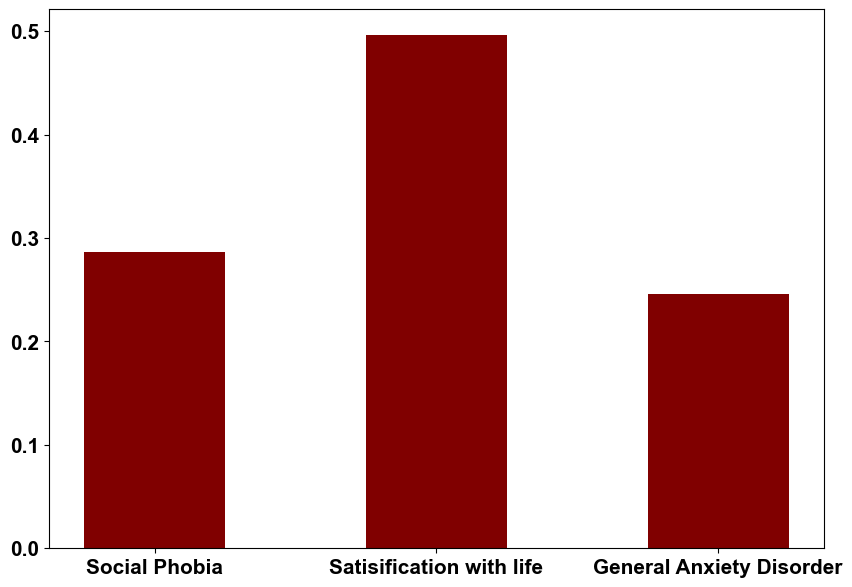

In [65]:
x=df.SPIN_T.mean()
y = df.SWL_T.mean()
z = df.GAD_T.mean()
c=[x,y,z]
plt.figure(figsize=(10,7))
plt.bar(['Social Phobia','Satisification with life','General Anxiety Disorder'],c,color ='maroon',
        width = 0.5)
plt.show()


In [67]:
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])
df.head()

GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  GADE  SWL1  SWL2  SWL3  SWL4  \
0     0     0     0     0     1     0     0     1     3     5     5     5   
1     1     2     2     2     0     1     0     2     3     5     2     5   
3     0     0     0     0     0     0     0     1     2     5     5     3   
4     2     1     2     2     2     3     2     3     2     2     4     5   
5     0     0     0     0     0     1     0     1     3     5     3     3   

   SWL5  Game  Platform     Hours  earnings  whyplay  League  streams  SPIN1  \
0     5     8         0  0.136364         1        1      18     0.00    1.0   
1     1     7         1  0.072727         1        1      18     0.02    2.0   
3     2     7         1  0.181818         1        2       4     0.05    2.0   
4     1     7         0  0.181818         1        1      18     0.01    2.0   
5     3     7         0  0.036364         1        3       4     0.00    1.0   

   SPIN2  SPIN3  SPIN4  SPIN5  SPIN6  SPIN7  SPIN8  SPIN9  SPIN10  SPIN11  \
0    0.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0     0.0     0.0   
1    1.0    1.0    3.0    2.0    3.0    1.0    3.0    4.0     0.0     3.0   
3    0.0    0.0    1.0    3.0    0.0    0.0    0.0    0.0     0.0     1.0   
4    0.0    0.0    0.0    1.0    0.0    0.0    4.0    2.0     0.0     1.0   
5    1.0    2.0    3.0    2.0    1.0    0.0    0.0    0.0     1.0     0.0   

   SPIN12  SPIN13  SPIN14  SPIN15  SPIN16  SPIN17  Narcissism  Gender  \
0     0.0     0.0     1.0     0.0     1.0     0.0         1.0       1   
1     0.0     1.0     3.0     3.0     1.0     2.0         1.0       1   
3     3.0     0.0     0.0     1.0     0.0     0.0         2.0       1   
4     0.0     0.0     0.0     0.0     3.0     0.0         1.0       1   
5     0.0     0.0     1.0     1.0     0.0     0.0         2.0       1   

        Age  Work  Degree  Reference  Playstyle     GAD_T     SWL_T    SPIN_T  \
0  0.155556     3       0          2          4  0.047619  0.600000  0.073529   
1  0.511111     3       0          2          3  0.380952  0.366667  0.485294   
3  0.222222     0       0          2          1  0.000000  0.400000  0.161765   
4  0.022222     0       1          2          3  0.666667  0.300000  0.191176   
5  0.133333     0       0          2          2  0.047619  0.400000  0.191176   

   Residence_ISO3  
0             102  
1             102  
3             102  
4              56  
5             102

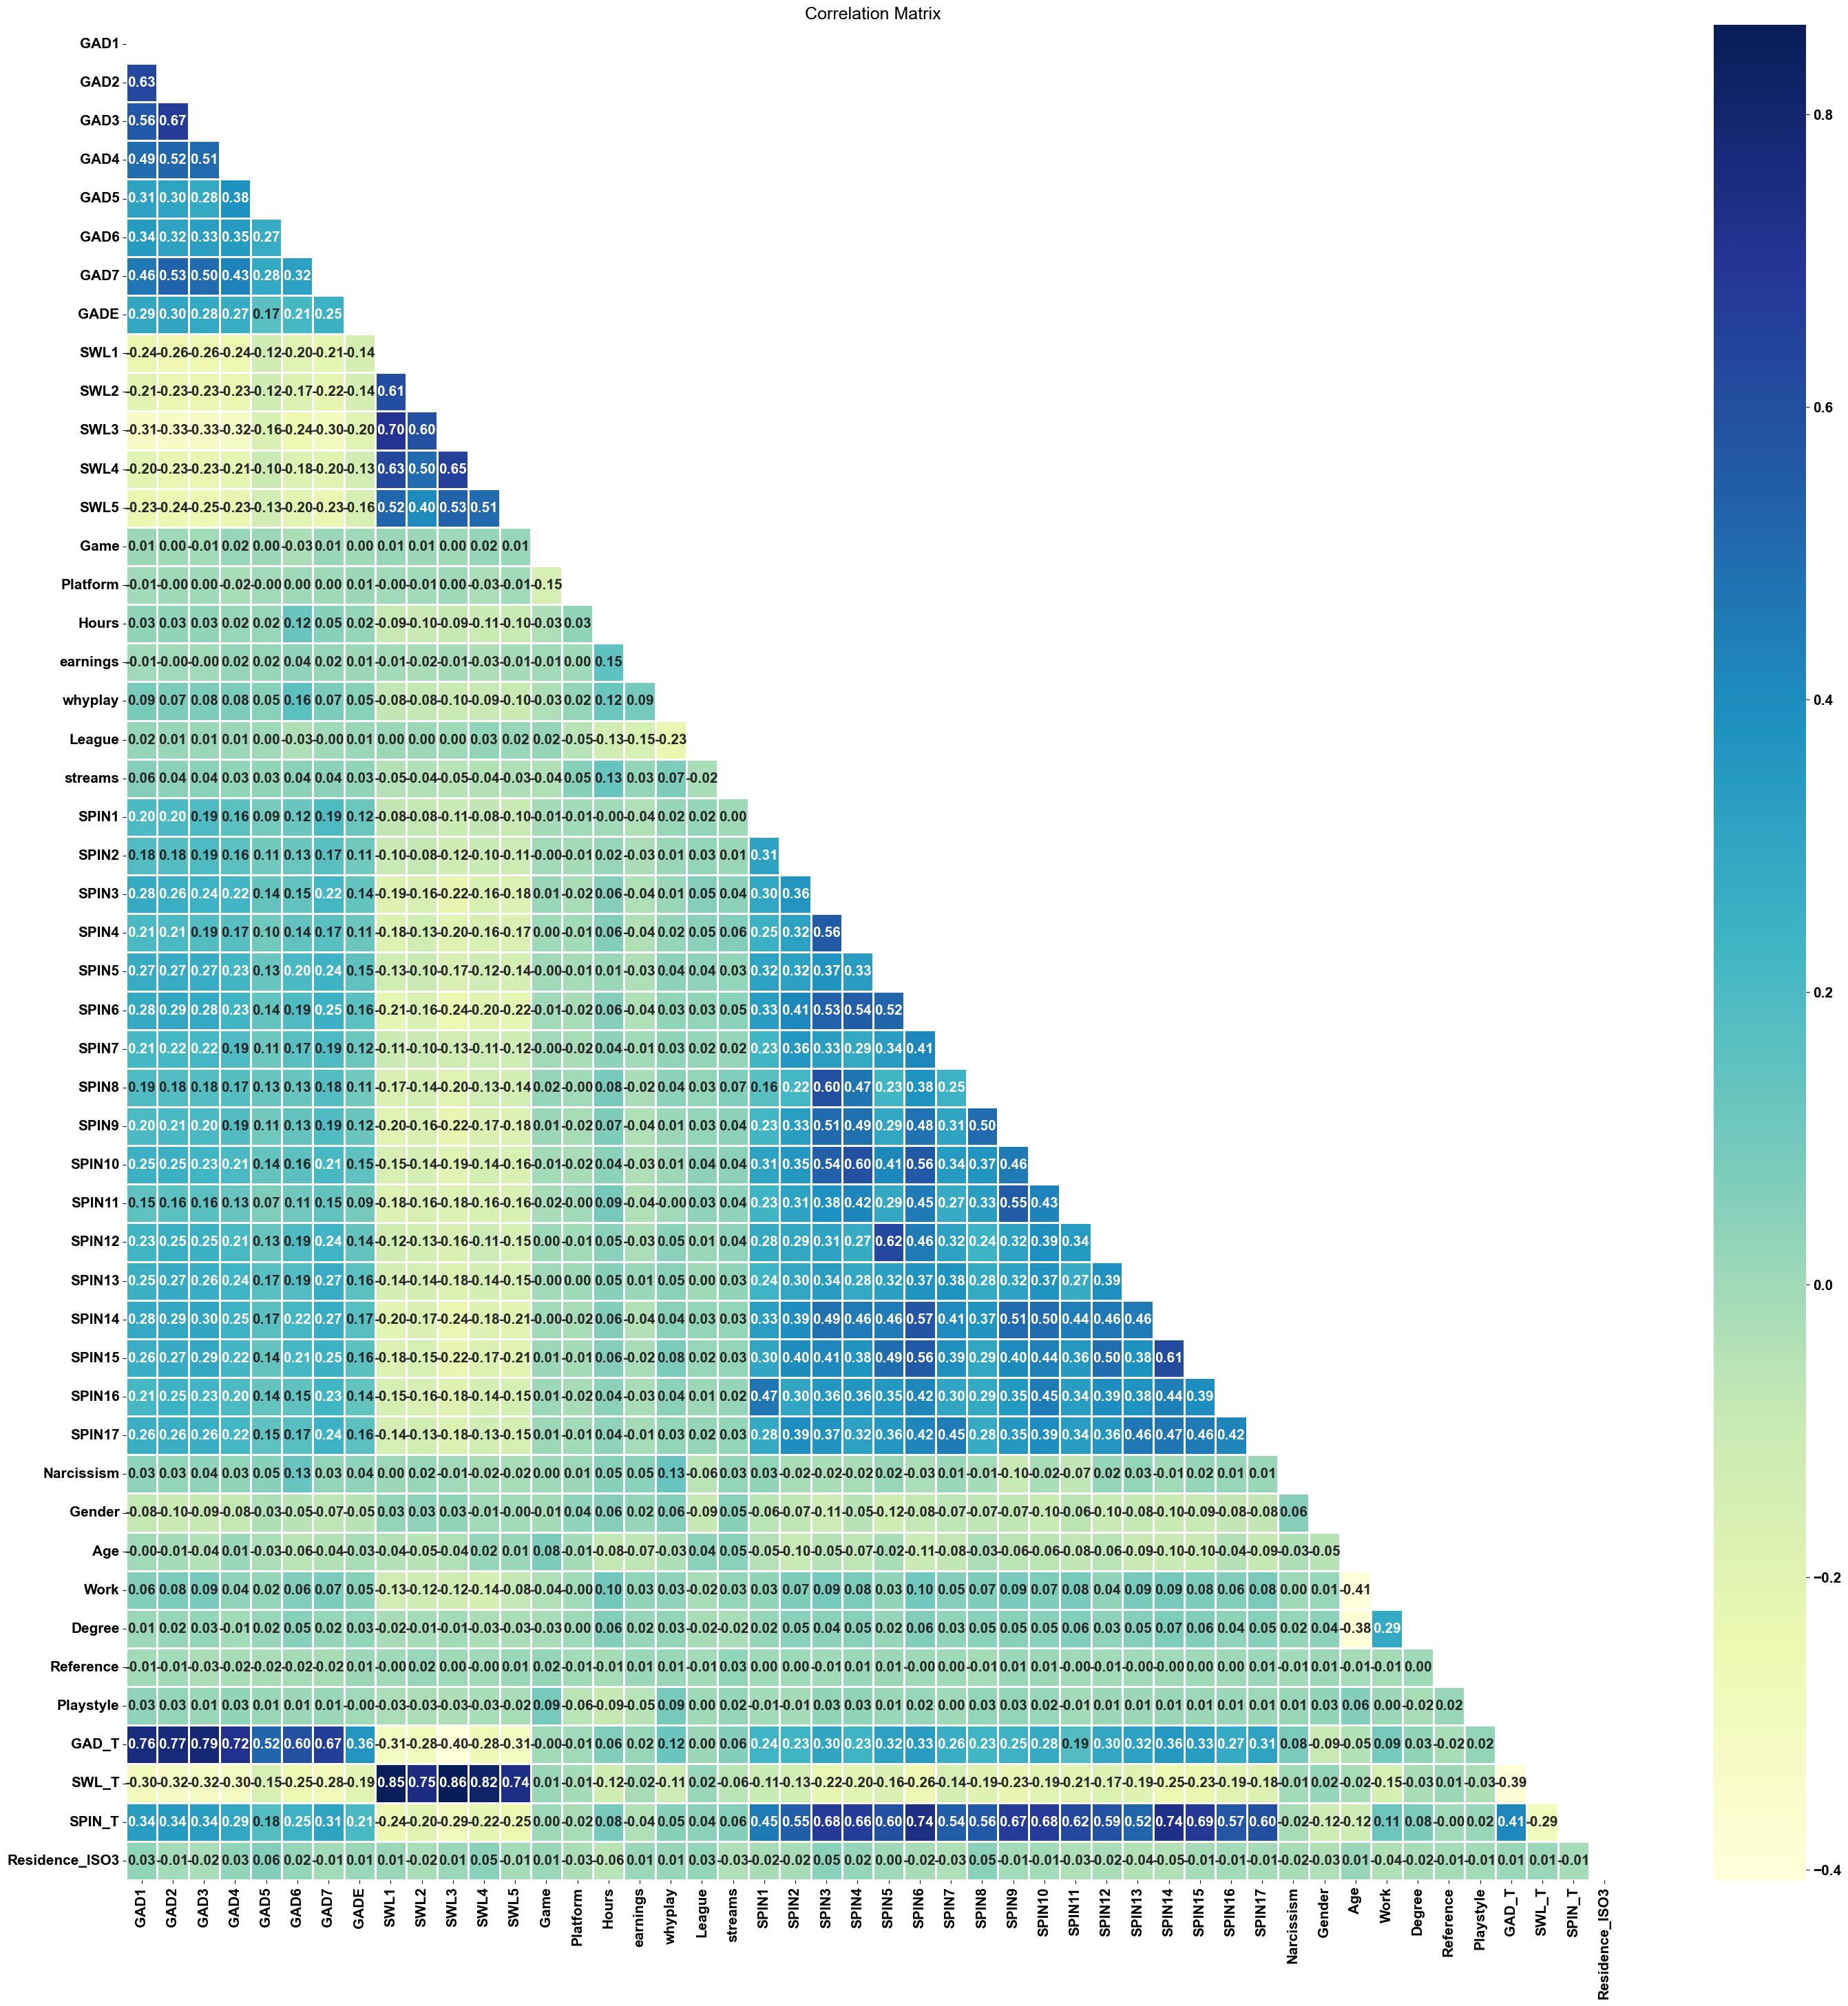

In [68]:
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (35, 35))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

In [69]:
df.head(1)

GAD1  GAD2  GAD3  GAD4  GAD5  GAD6  GAD7  GADE  SWL1  SWL2  SWL3  SWL4  \
0     0     0     0     0     1     0     0     1     3     5     5     5   

   SWL5  Game  Platform     Hours  earnings  whyplay  League  streams  SPIN1  \
0     5     8         0  0.136364         1        1      18      0.0    1.0   

   SPIN2  SPIN3  SPIN4  SPIN5  SPIN6  SPIN7  SPIN8  SPIN9  SPIN10  SPIN11  \
0    0.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0     0.0     0.0   

   SPIN12  SPIN13  SPIN14  SPIN15  SPIN16  SPIN17  Narcissism  Gender  \
0     0.0     0.0     1.0     0.0     1.0     0.0         1.0       1   

        Age  Work  Degree  Reference  Playstyle     GAD_T  SWL_T    SPIN_T  \
0  0.155556     3       0          2          4  0.047619    0.6  0.073529   

   Residence_ISO3  
0             102

In [70]:
df1 = df[['GAD_T'  , 'SWL_T' , 'SPIN_T' ]]
df2 = df[[ 'Age' ,  'Hours' , 'streams' ]]
pc1 = PCA(n_components=2)
pc2 = PCA(n_components=2)

In [71]:
x1 = pc1.fit_transform(df1)
x2 = pc2.fit_transform(df2)
x = x1 + x2

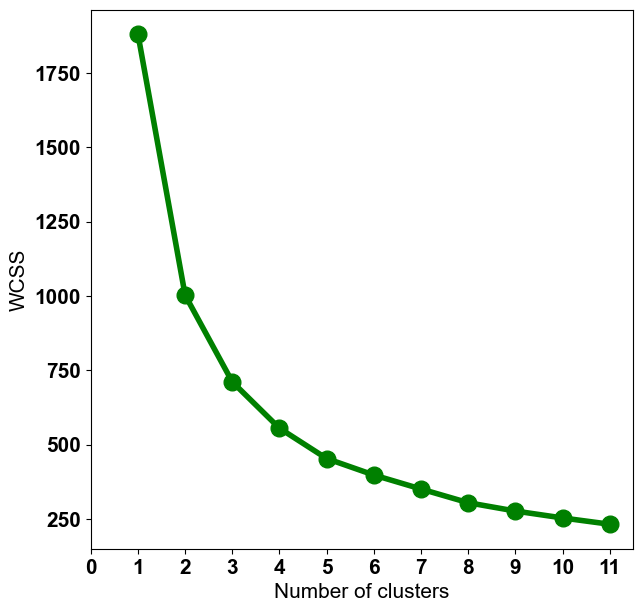

In [72]:
WCSS = []
for i in range(1,12):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_) #inertia --> error
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,12),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(12))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [73]:
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 40, random_state = 0)
y_clusters = model.fit_predict(x)

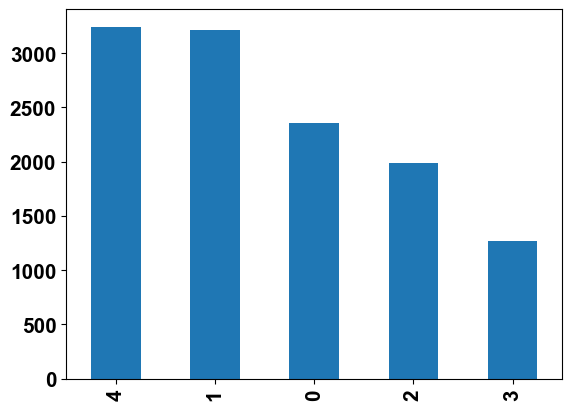

In [74]:
pd.Series(y_clusters).value_counts().plot(kind='bar');


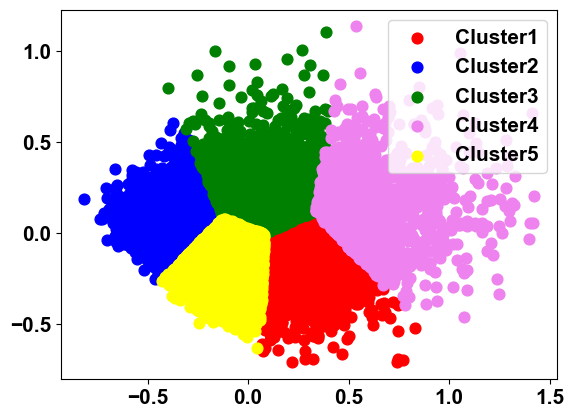

In [75]:
plt.scatter(x[y_clusters == 0, 0], x[y_clusters == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(x[y_clusters == 1, 0], x[y_clusters == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(x[y_clusters == 2, 0], x[y_clusters == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(x[y_clusters == 3, 0], x[y_clusters == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(x[y_clusters == 4, 0], x[y_clusters == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 

plt.legend()
plt.show()

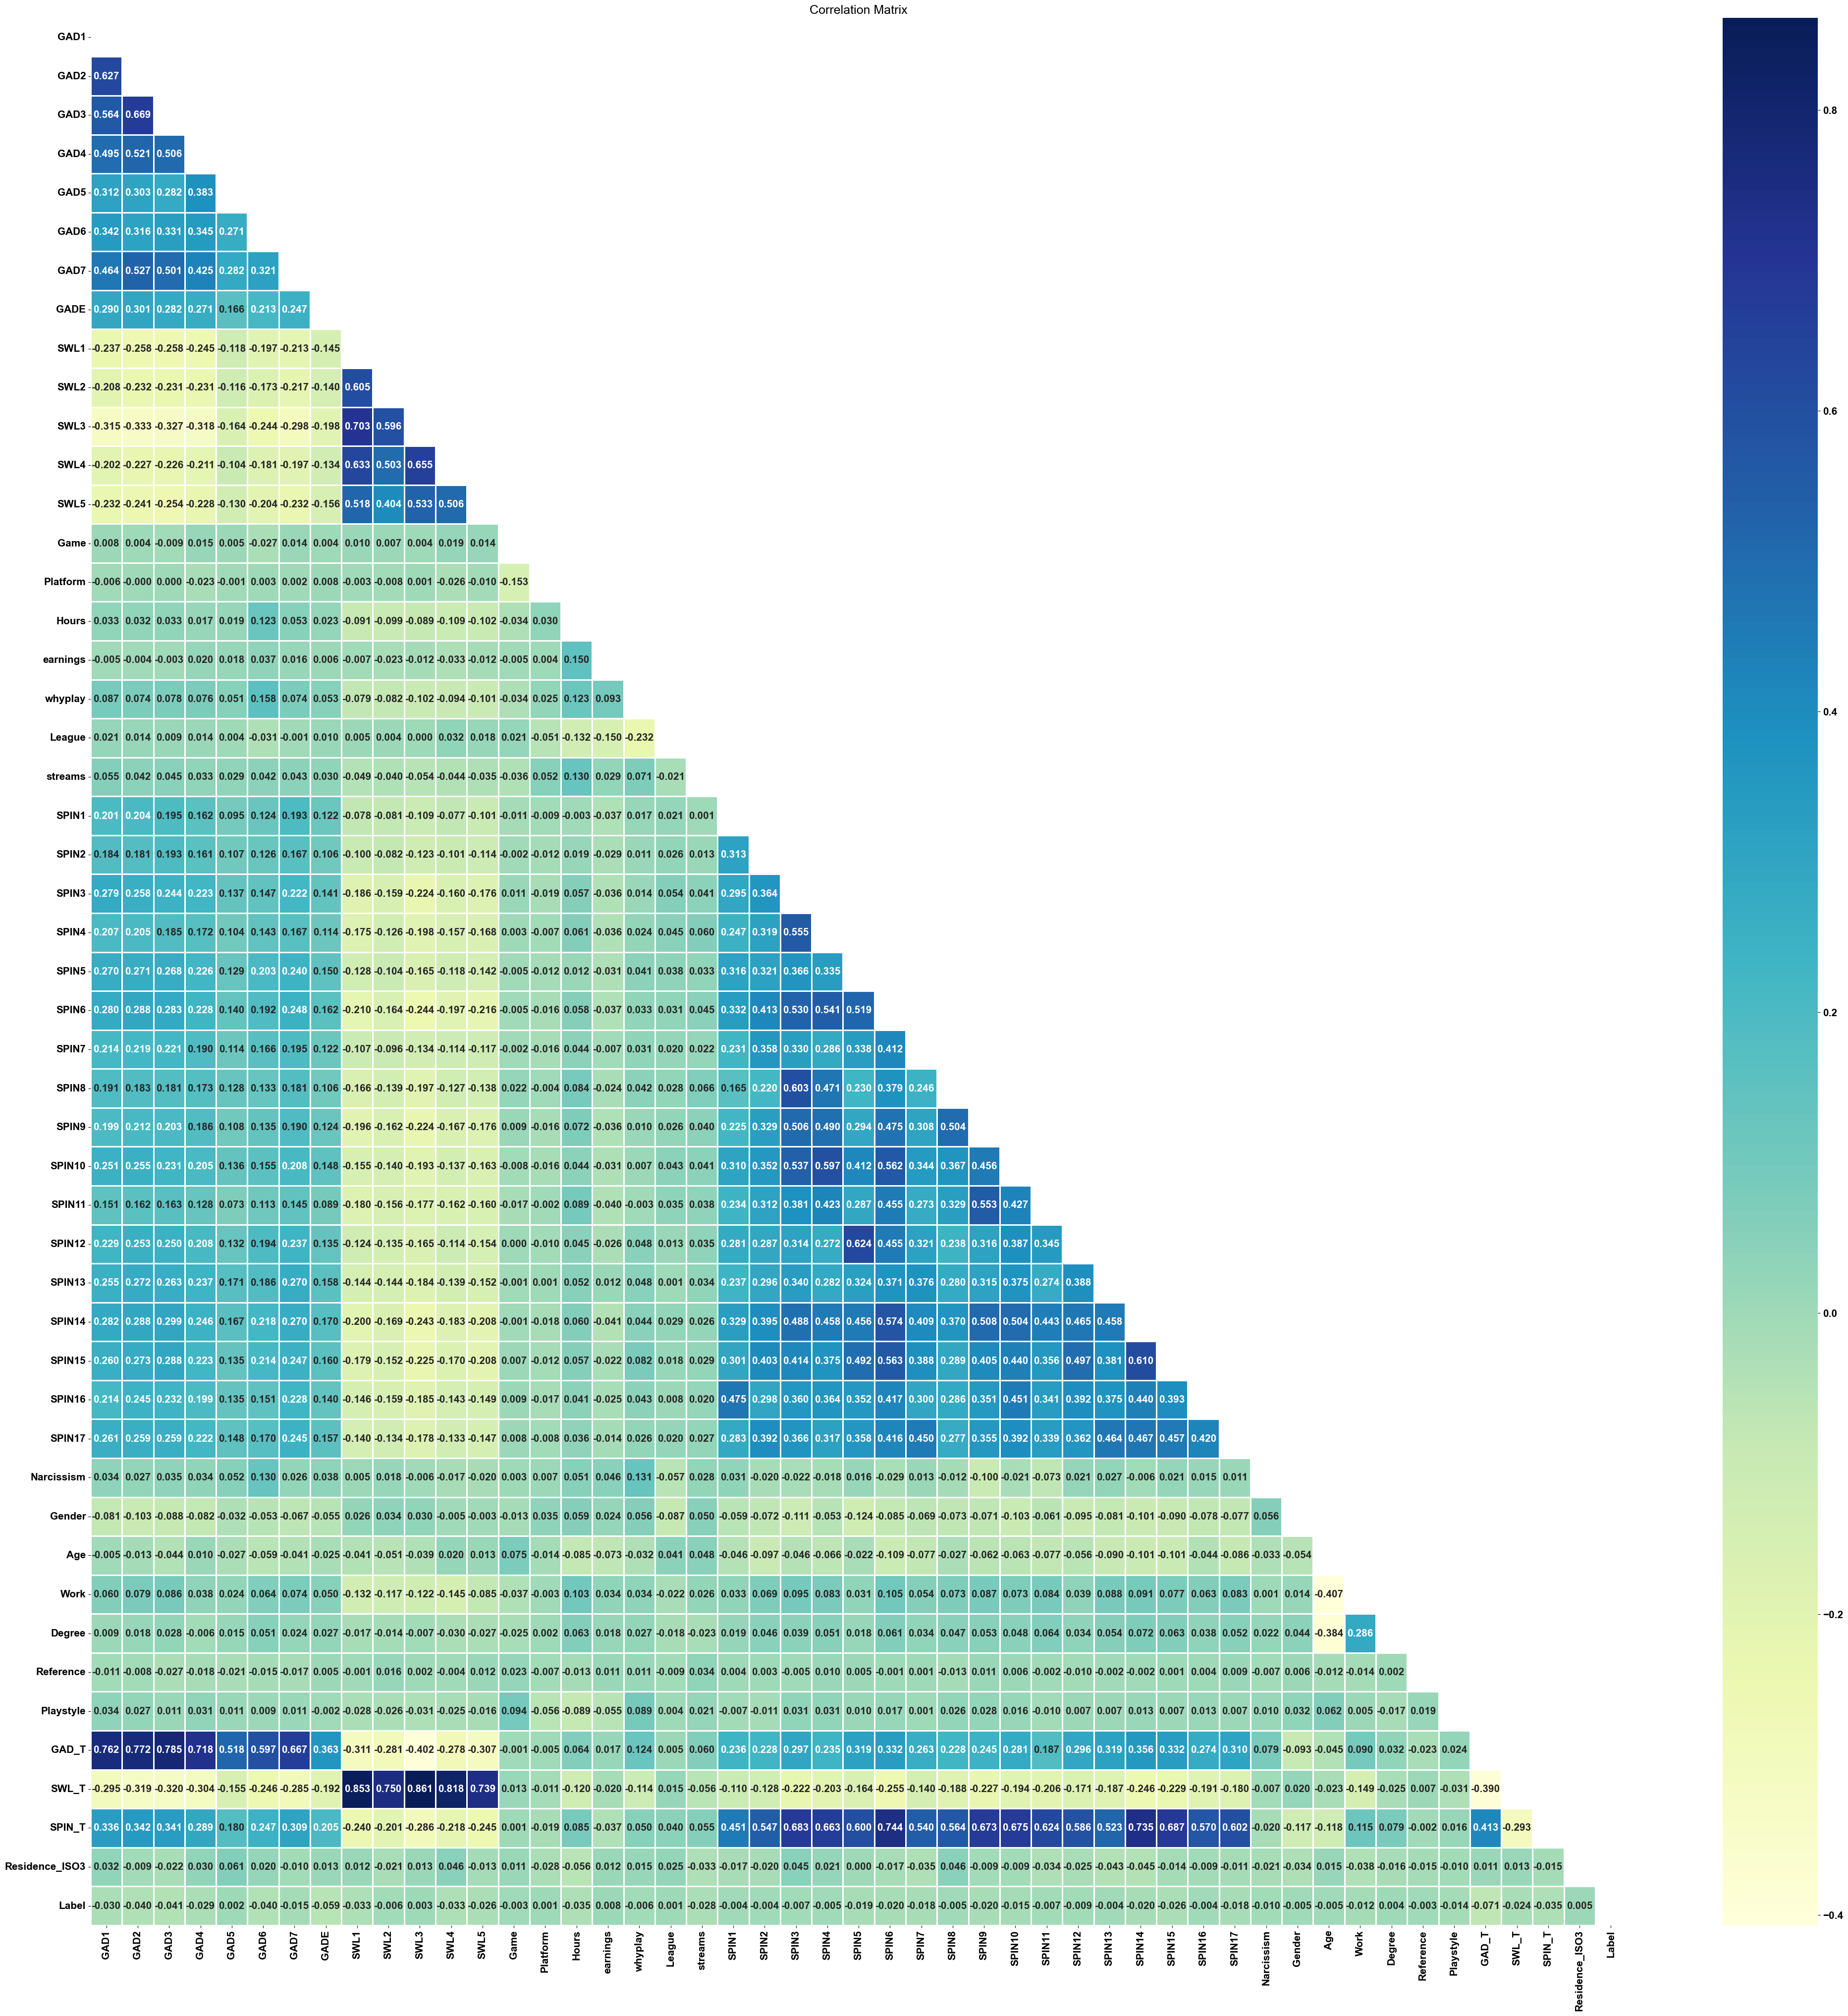

In [76]:
df['Label'] = y_clusters
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (50, 50))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".3f")
cormat.set_title('Correlation Matrix')
plt.show()

In [77]:
plt.rcParams.update({'font.size': 12})
df['Label'].value_counts()

4    3245
1    3215
0    2360
2    1992
3    1269
Name: Label, dtype: int64

In [78]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [79]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,train_size=.8,random_state=44)

In [80]:
4 > 1 > 0 > 2 > 3

False

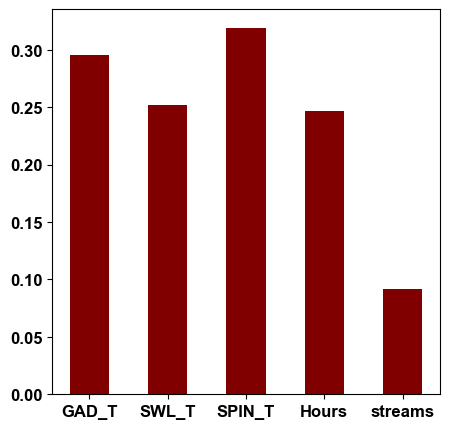

In [81]:
l1 = df[df['Label'] == 0]['GAD_T'].mean()
l2 = df[df['Label'] == 0]['SWL_T'].mean()
l3 = df[df['Label'] == 0]['SPIN_T'].mean()
l4 = df[df['Label'] == 0]['Hours'].mean()
l5 = df[df['Label'] == 0]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color ='maroon',width = 0.5)
plt.show()

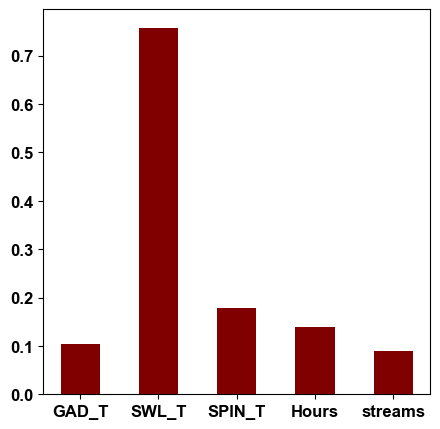

In [82]:
l1 = df[df['Label'] == 1]['GAD_T'].mean()
l2 = df[df['Label'] == 1]['SWL_T'].mean()
l3 = df[df['Label'] == 1]['SPIN_T'].mean()
l4 = df[df['Label'] == 1]['Hours'].mean()
l5 = df[df['Label'] == 1]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color ='maroon',width = 0.5)
plt.show()

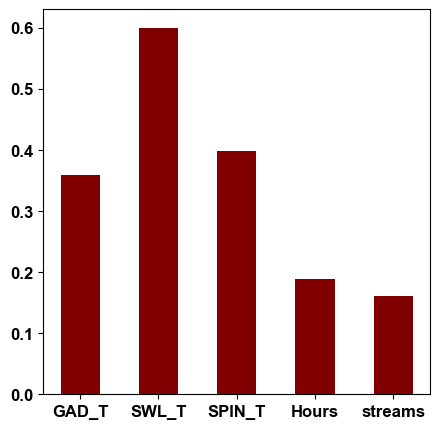

In [83]:
l1 = df[df['Label'] == 2]['GAD_T'].mean()
l2 = df[df['Label'] == 2]['SWL_T'].mean()
l3 = df[df['Label'] == 2]['SPIN_T'].mean()
l4 = df[df['Label'] == 2]['Hours'].mean()
l5 = df[df['Label'] == 2]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color ='maroon',width = 0.5)
plt.show()

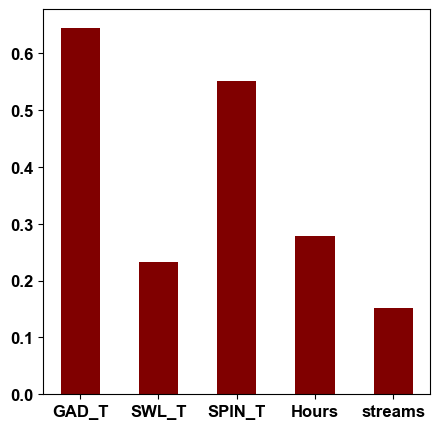

In [84]:
l1 = df[df['Label'] == 3]['GAD_T'].mean()
l2 = df[df['Label'] == 3]['SWL_T'].mean()
l3 = df[df['Label'] == 3]['SPIN_T'].mean()
l4 = df[df['Label'] == 3]['Hours'].mean()
l5 = df[df['Label'] == 3]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color ='maroon',width = 0.5)
plt.show()

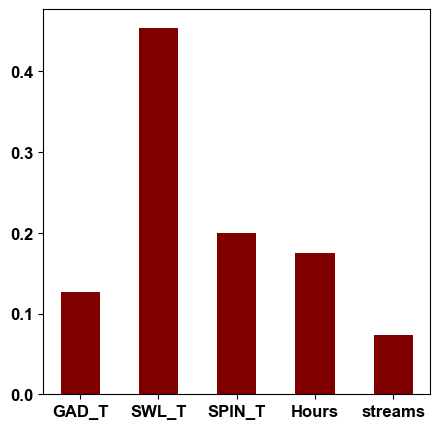

In [85]:
l1 = df[df['Label'] == 4]['GAD_T'].mean()
l2 = df[df['Label'] == 4]['SWL_T'].mean()
l3 = df[df['Label'] == 4]['SPIN_T'].mean()
l4 = df[df['Label'] == 4]['Hours'].mean()
l5 = df[df['Label'] == 4]['streams'].mean()

c=[l1,l2,l3,l4,l5]
plt.figure(figsize=(5,5))
plt.bar(['GAD_T','SWL_T','SPIN_T' ,'Hours' , 'streams'],c,color ='maroon',width = 0.5)
plt.show()

In [86]:
clf = RandomForestClassifier(n_estimators = 1000 , random_state=44, max_depth=8) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [87]:
clf.score(X_test,y_test)

0.8196110881257758

In [88]:
clf.score(X_train,y_train)

0.8713783112582781

In [89]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       496
           1       0.89      0.86      0.87       684
           2       0.72      0.77      0.75       335
           3       0.76      0.96      0.85       214
           4       0.83      0.78      0.81       688

    accuracy                           0.82      2417
   macro avg       0.80      0.83      0.82      2417
weighted avg       0.82      0.82      0.82      2417



In [90]:
confusion_matrix(y_pred,y_test)

array([[395,   0,  29,  41,  31],
       [  3, 586,  36,   0,  59],
       [ 18,  19, 258,  23,  17],
       [  6,   0,   3, 205,   0],
       [ 68,  52,  31,   0, 537]], dtype=int64)

In [91]:
answer = clf.predict(X_test.iloc[30:45,:])
print(list(answer))
print(y_test.iloc[30:45].to_list())

[1, 1, 0, 4, 4, 4, 1, 4, 2, 3, 4, 0, 0, 1, 0]
[1, 1, 2, 4, 0, 4, 1, 0, 2, 3, 1, 4, 0, 1, 0]


In [93]:
lc = LogisticRegression(max_iter=3250 , n_jobs=-1 )
lc.fit(X_train,y_train)
lc_pred = lc.predict(X_test)
accuracy_score(lc_pred,y_test)

0.9300786098469177

In [94]:
print(classification_report(lc_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       485
           1       0.94      0.95      0.95       647
           2       0.94      0.92      0.93       365
           3       0.92      0.94      0.93       262
           4       0.93      0.91      0.92       658

    accuracy                           0.93      2417
   macro avg       0.93      0.93      0.93      2417
weighted avg       0.93      0.93      0.93      2417



In [95]:
print(confusion_matrix(lc_pred,y_test))

[[449   0   8  14  14]
 [  0 617   9   0  21]
 [  5   8 335   8   9]
 [ 12   0   3 247   0]
 [ 24  32   2   0 600]]


In [96]:
lc.score(X_train,y_train)

0.9392591059602649

In [97]:
lc.score(X_test,y_test)

0.9300786098469177

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier(n_estimators=200, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xg.fit(X_train,y_train)
xgpred = xg.predict(X_test)
accuracy_score(xgpred,y_test) ''

RandomForestClassifier(max_depth=9, min_samples_leaf=100, min_samples_split=50,
                       n_jobs=-1, random_state=44)